# Extreme Value Analysis For the Maximum Daily SST in Alcatrazes from 1980 to 2019

## 1. Loading and Preparing the Data

### 1.1. Importing "Regular" Packages to Be Used

In [1]:
import netCDF4
from netCDF4 import Dataset
import pandas as pd
from pandas import Series
from pandas.plotting import lag_plot
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=["black"])
plt.rcParams.update({'font.size': 12})
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

### 1.2. Reading the NetCDF Data From .nc Extension Archives

In [2]:
nc1 = Dataset("C:/Users/fabio/Desktop/Fabio/artigo onda/Hs1980-1990.nc")
nc2 = Dataset("C:/Users/fabio/Desktop/Fabio/artigo onda/Hs1991-2001.nc")
nc3 = Dataset("C:/Users/fabio/Desktop/Fabio/artigo onda/Hs2002-2012.nc")
nc4 = Dataset("C:/Users/fabio/Desktop/Fabio/artigo onda/Hs2013-2022.nc")
print(nc1)
print(nc2)
print(nc3)
print(nc4)


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2023-11-09 23:51:55 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin -S param -o /cache/data6/adaptor.mars.internal-1699569583.319357-29148-11-e33d3af0-8bdd-4f28-a035-09e7a1050b0f.nc /cache/tmp/e33d3af0-8bdd-4f28-a035-09e7a1050b0f-adaptor.mars.internal-1699565783.5715756-29148-16-tmp.grib
    dimensions(sizes): longitude(1), latitude(1), time(96432)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 swh(time, latitude, longitude)
    groups: 
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2023-11-10 02:08:24 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin -S param -o /cache/data7/adaptor.mars.internal-1699577742.514387-1677-16-fd782e56-94aa-4690-89

### 1.3. Printing Informations About the Variables (Values and Units)

In [6]:
# period 1: from 1980 to 1989

print("Period 1: from 1980 to 1989\n")

time1 = nc1.variables["time"] # variable time: from 1980 to 1989 in seconds since 1970-01-01
print("The values of time are {}, given in {}.\n".format(time1[:], time1.units))

latitude1 = nc1.variables["latitude"] # variable latitude: -24.0 degrees_north
print("The value of latitude is {}, given in {}.\n".format(latitude1[:], latitude1.units))

longitude1 = nc1.variables["longitude"] # variable longitude: -48.0 degrees_east
print("The value of longitude is {}, given in {}.\n".format(longitude1[:], longitude1.units))

swh1 = nc1.variables["swh"] # variable tas (air temperature near surface): Kelvin
print("The values of swh are {}, given in {}.".format(temperature1[:], temperature1.units))

# +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
print("\n+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+\n")
# +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

# period 2: from 1990 to 1999

print("Period 2: from 1990 to 1999\n")

time2 = nc2.variables["time"] # variable time: from 1990 to 1999 in seconds since 1970-01-01
print("The values of time are {}, given in {}.\n".format(time2[:], time2.units))

latitude2 = nc2.variables["latitude"] # variable latitude: -24.0 degrees_north
print("The value of latitude is {}, given in {}.\n".format(latitude2[:], latitude2.units))

longitude2 = nc2.variables["longitude"] # variable longitude: -48.0 degrees_east
print("The value of longitude is {}, given in {}.\n".format(longitude2[:], longitude2.units))

swh2 = nc2.variables["swh"] # variable tas (air temperature near surface): Kelvin
print("The values of swh are {}, given in {}.".format(temperature2[:], temperature2.units))

# +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
print("\n+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+\n")
# +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

# period 3: from 2000 to 2009

print("Period 3: from 2000 to 2009\n")

time3 = nc3.variables["time"] # variable time: from 2000 to 2009 in seconds since 1970-01-01
print("The values of time are {}, given in {}.\n".format(time3[:], time3.units))

latitude3 = nc3.variables["latitude"] # variable latitude: -24.0 degrees_north
print("The value of latitude is {}, given in {}.\n".format(latitude3[:], latitude3.units))

longitude3 = nc3.variables["longitude"] # variable longitude: -48.0 degrees_east
print("The value of longitude is {}, given in {}.\n".format(longitude3[:], longitude3.units))

swh3 = nc3.variables["swh"] # variable tas (air temperature near surface): Kelvin
print("The values of swh are {}, given in {}.".format(temperature3[:], temperature3.units))

# +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
print("\n+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+\n")
# +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

# period 4: from 2010 to 2019

print("Period 4: from 2010 to 2019\n")

time4 = nc4.variables["time"] # variable time: from 2010 to 2019 in seconds since 1970-01-01
print("The values of time are {}, given in {}.\n".format(time4[:], time4.units))

latitude4 = nc4.variables["latitude"] # variable latitude: -24.0 degrees_north
print("The value of latitude is {}, given in {}.\n".format(latitude4[:], latitude4.units))

longitude4 = nc4.variables["longitude"] # variable longitude: -48.0 degrees_east
print("The value of longitude is {}, given in {}.\n".format(longitude4[:], longitude4.units))

swh4 = nc4.variables["swh"] # variable tas (air temperature near surface): Kelvin
print("The values of swh are {}, given in {}.".format(temperature4[:], temperature4.units))

# period 4: from 2010 to 2019

print("Period 5: from 2020 to 2022\n")



Period 1: from 1980 to 1989

The values of time are [701256 701257 701258 ... 797685 797686 797687], given in hours since 1900-01-01 00:00:00.0.

The value of latitude is [-24.12], given in degrees_north.

The value of longitude is [-45.71], given in degrees_east.

The values of swh are [[[1.56042335]]

 [[1.73205072]]

 [[1.81161616]]

 ...

 [[1.79094377]]

 [[1.79918614]]

 [[1.80556733]]], given in m.

+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Period 2: from 1990 to 1999

The values of time are [797688 797689 797690 ... 894117 894118 894119], given in hours since 1900-01-01 00:00:00.0.

The value of latitude is [-24.12], given in degrees_north.

The value of longitude is [-45.71], given in degrees_east.

The values of swh are [[[1.80937586]]

 [[1.82067819]]

 [[1.84117143]]

 ...

 [[1.20494963]]

 [[1.17762532]]

 [[1.15520696]]], given in m.

+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Period 3: 

### 1.4 Extracting the Time Series for Air Temperature

### 1.4 Extracting the Time Series for Air Temperature

In [9]:
# time series for each period (1, 2, 3, 4)
flat_swh_array1 = np.array(swh1).flatten()
flat_swh_array2 = np.array(swh2).flatten()
flat_swh_array3 = np.array(swh3).flatten()
flat_swh_array4 = np.array(swh4).flatten()




i1 = netCDF4.num2date(time1[:], time1.units, only_use_cftime_datetimes = False, only_use_python_datetimes = True) # from time (in seconds) to the corresponding date (format "YYYY-MM-DD hh:mm:ss")
X1 = pd.Series(flat_swh_array1[:], index = i1, name = "swh") # temperatures in ºC indexed by date

i2 = netCDF4.num2date(time2[:], time2.units, only_use_cftime_datetimes = False, only_use_python_datetimes = True) # from time (in seconds) to the corresponding date (format "YYYY-MM-DD hh:mm:ss")
X2 = pd.Series(flat_swh_array2[:], index = i2, name = "swh") # temperatures in ºC indexed by date

i3 = netCDF4.num2date(time3[:], time3.units, only_use_cftime_datetimes = False, only_use_python_datetimes = True) # from time (in seconds) to the corresponding date (format "YYYY-MM-DD hh:mm:ss")
X3 = pd.Series(flat_swh_array3[:], index = i3, name = "swh") # temperatures in ºC indexed by date

i4 = netCDF4.num2date(time4[:], time4.units, only_use_cftime_datetimes = False, only_use_python_datetimes = True) # from time (in seconds) to the corresponding date (format "YYYY-MM-DD hh:mm:ss")
X4 = pd.Series(flat_swh_array4[:], index = i4, name = "swh") # temperatures in ºC indexed by date

# time series for the entire period (1 + 2 + 3 + 4)
X = pd.concat([X1, X2, X3, X4])


The time series is a finite sequence (enumerated collection) $X=\{X_{i},i\in\mathcal{D}\}$, wherein $\mathcal{D}$ is a set of dates separated by an unit interval of hour, from "1980-01-01 00:00:00" to "2019-12-31 23:00:00".

### 1.5. Visualizing the Data and Eliminating Trend and Seasonality

We first look at the histogram for air temperature in Iguape from 1980 to 2019.

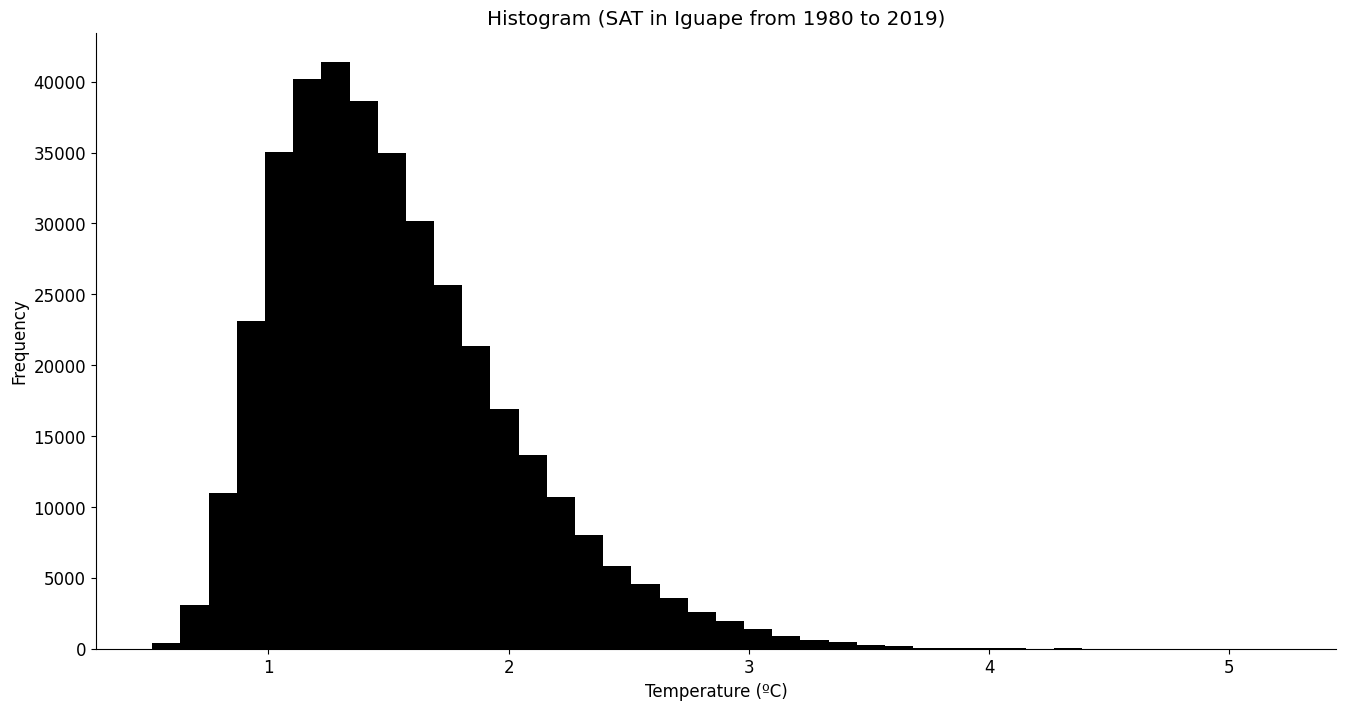

In [10]:
plt.figure(figsize = (16, 8))
plt.hist(X, bins = 40)
plt.xlabel("Temperature (ºC)")
plt.title("Histogram (SAT in Iguape from 1980 to 2019)")
plt.ylabel("Frequency")
plt.show()

We also look at the month-wise boxplots for air temperature in Iguape from 1980 to 2019.

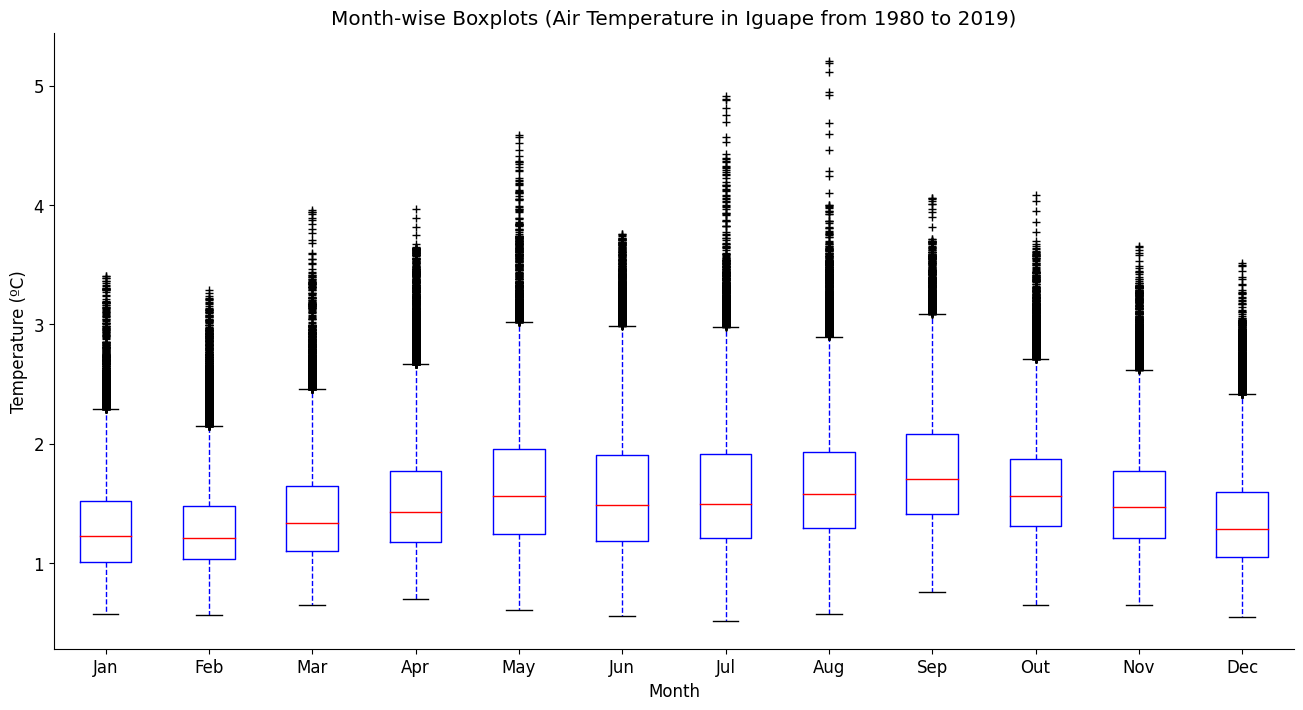

In [11]:
months_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Out", "Nov", "Dec"]
plt.figure(figsize = (16, 8))
bp1 = plt.boxplot([X[X.index.month == m] for m in range(1, 13)], labels = months_names, vert = True)
plt.setp(bp1["medians"], color = "red")
plt.setp(bp1["boxes"], color = "blue")
plt.setp(bp1["whiskers"], color = "blue", linestyle = "--")
plt.setp(bp1["fliers"], color = "black", marker = "+")
plt.xlabel("Month")
plt.ylabel("Temperature (ºC)")
plt.title("Month-wise Boxplots (Air Temperature in Iguape from 1980 to 2019)")
plt.show()

From this figure, it is clear that there is an annual seasonality.

[trecho abaixo copiado de https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/]:

Time series data often exhibit some slow, gradual variability in addition to higher frequency variability such as seasonality and noise. An easy way to visualize these trends is with rolling means at different time scales.

A rolling mean tends to smooth a time series by averaging out variations at frequencies much higher than the window size and averaging out any seasonality on a time scale equal to the window size. This allows lower-frequency variations in the data to be explored.

Below we plot the (original) time series, besides its moving average and moving standard deviation built (both) with a window size of 8760 data points, the number of hours in 1 non leap year.

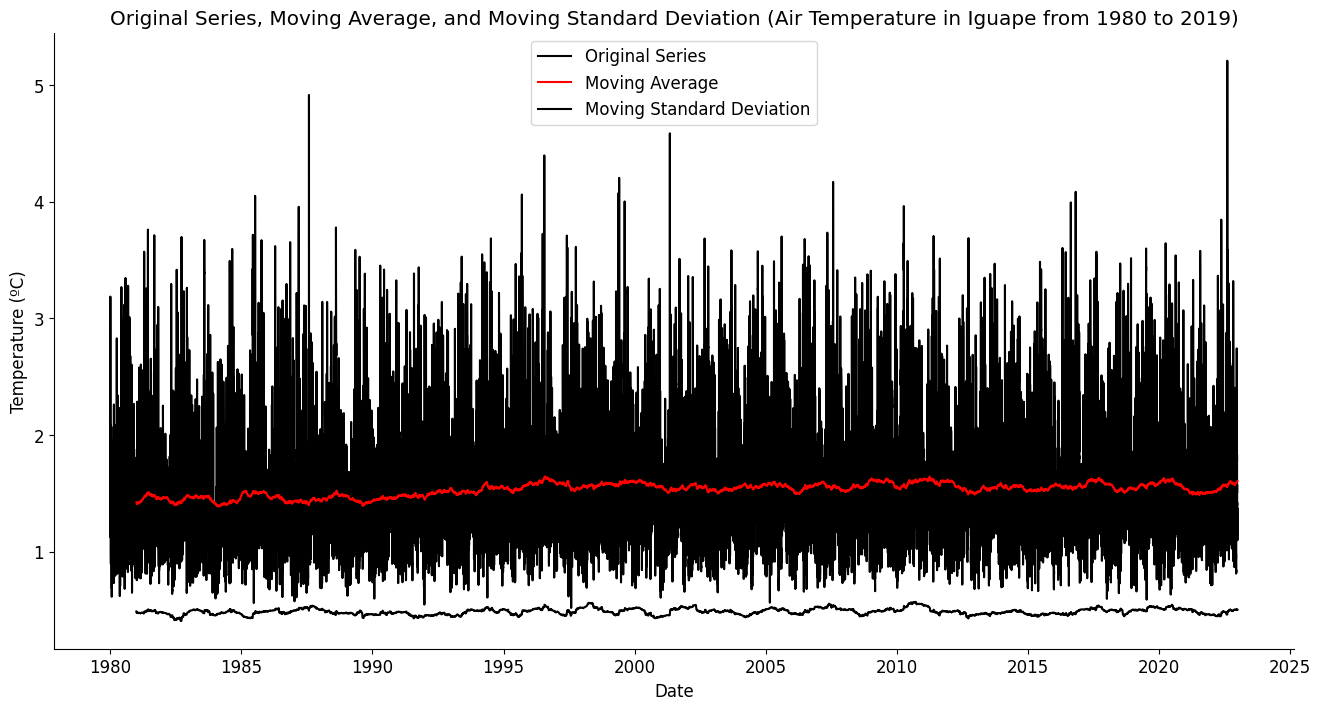

In [12]:
# determing rolling statistics
X_moving_avg = X.rolling(center = False, window = 8760).mean() # moving average of X
X_moving_std = X.rolling(center = False, window = 8760).std() # moving standard deviation of X

# plotting rolling statistics
plt.figure(figsize = (16, 8))
plt.plot(X, label = "Original Series")
plt.plot(X_moving_avg, color = "red", label = "Moving Average")
plt.plot(X_moving_std, color = "black", label = "Moving Standard Deviation")
plt.xlabel("Date")
plt.ylabel("Temperature (ºC)")
plt.legend(loc = "best")
plt.title("Original Series, Moving Average, and Moving Standard Deviation (Air Temperature in Iguape from 1980 to 2019)")
plt.show()

The behaviour our time series shows that we are dealing with an additive model, i.e., the original data is the sum of a trend, a
seasonal component and a residual part:
$$X=\mathrm{trend}+\mathrm{seasonal\;component}+\mathrm{residual}.$$

So, we first construct a detrended time series $Y$ by subtracting from $X$ its moving average:

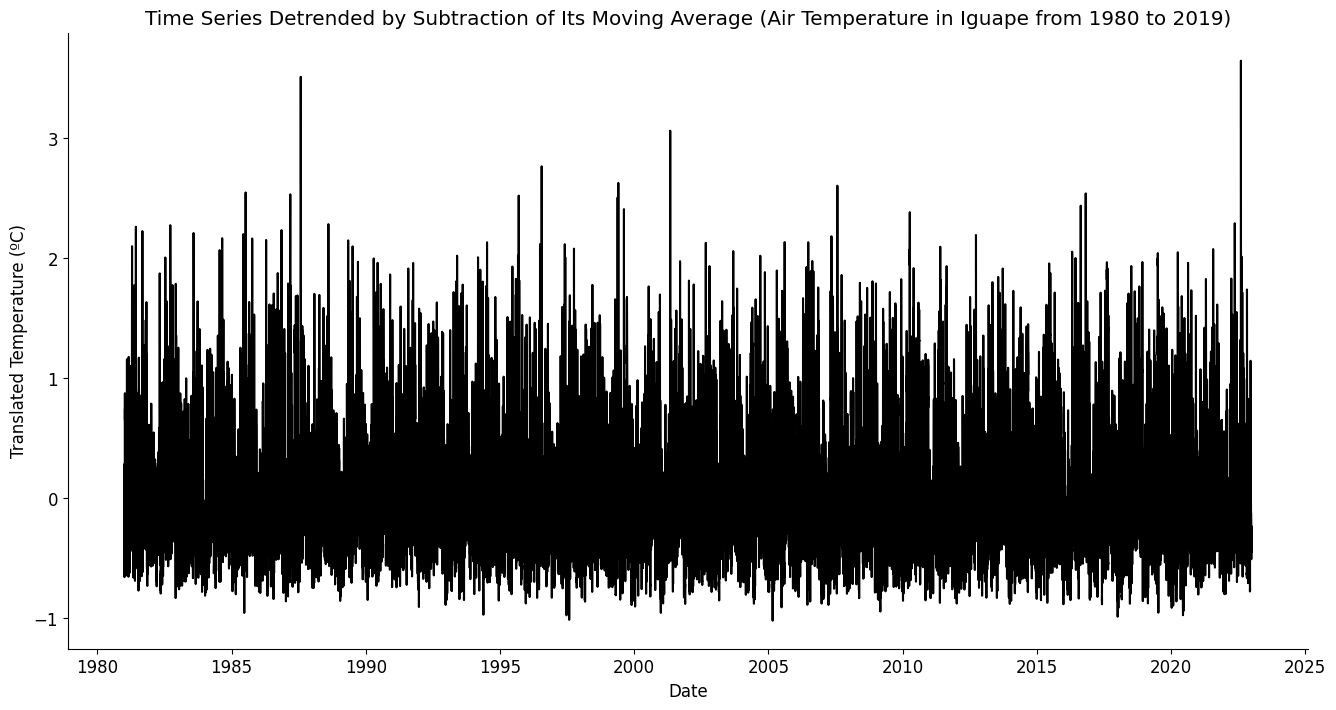

In [13]:
# detrending the time series
Z = X - X_moving_avg

# plotting the detrended time series
plt.figure(figsize = (16, 8))
plt.plot(Z)
plt.xlabel("Date")
plt.ylabel("Translated Temperature (ºC)")
plt.title("Time Series Detrended by Subtraction of Its Moving Average (Air Temperature in Iguape from 1980 to 2019)")
plt.show()

To construct the deseasonalized (without the annual cycle) times series $W$, we follow the refence [Nobre_Paião_Amêndola-1984]: from each value $Z_{i}$ we subtract the mean over the entire period (1980-2019) with the corresponding month fixed, i.e., considering that the index of the time series can be written as $i=(Y,M,D,h)$ (Year, Month, Day, hour), we calculate

$$W_{(Y,M,D,h)}=\dfrac{Z_{(Y,M,D,h)}-\overline{Z_{(\cdot,M,\cdot,\cdot)}}}{\overline{\sigma_{(\cdot,M,\cdot,\cdot)}}},$$

wherein $\overline{Z_{(\cdot,M,\cdot,\cdot)}}$ is the (sample) mean and $\overline{\sigma_{(\cdot,M,\cdot,\cdot)}}$ is the (sample) standard deviation of temperatures for the entire period (1980-2019) for a fixed month $M$, respectively.    

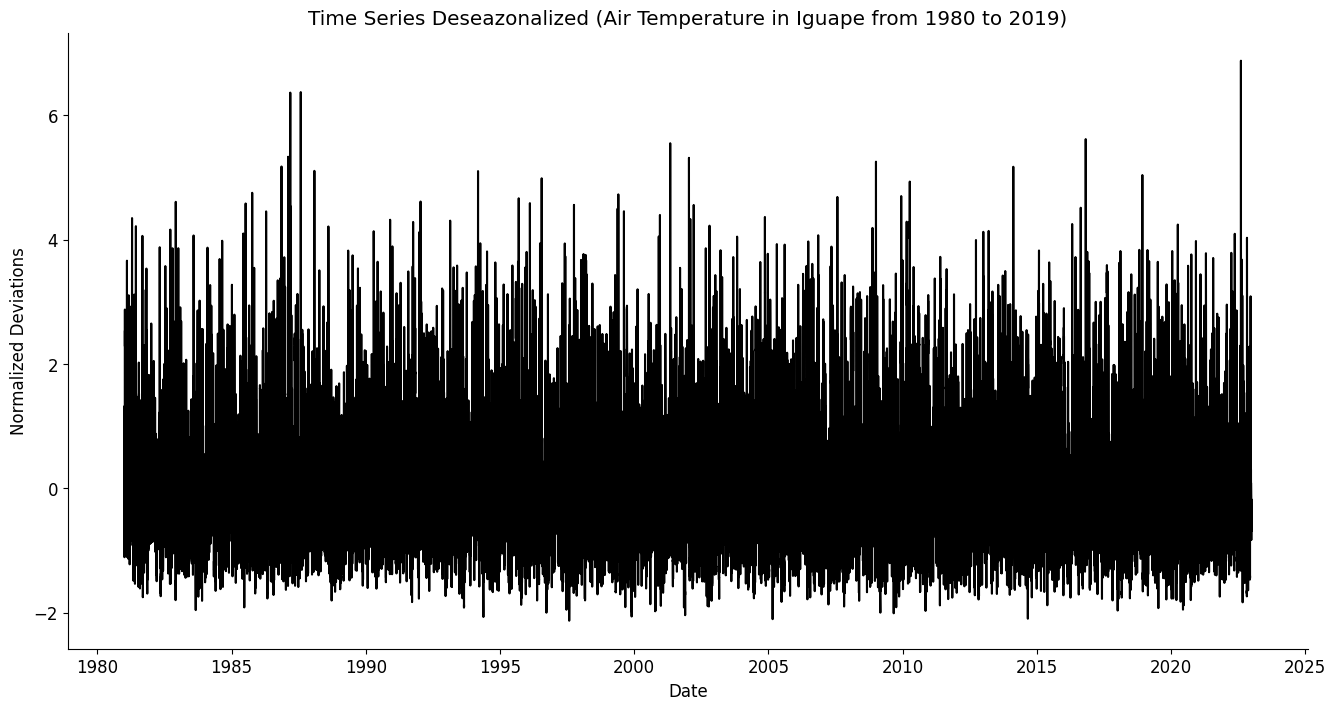

In [14]:
# deseazonalizing the time series
i = X.index
W = pd.Series("NaN", index = i, dtype = float, name = "normalized deviation")
for m in range(1, 13):
    W[Z.index.month == m] = (Z[Z.index.month == m] - Z[Z.index.month == m].mean())/(Z[Z.index.month == m].std())
W = W.dropna()

# plotting the deseazonalized time series
plt.figure(figsize = (16, 8))
plt.plot(W)
plt.xlabel("Date")
plt.ylabel("Normalized Deviations")
plt.title("Time Series Deseazonalized (Air Temperature in Iguape from 1980 to 2019)")
plt.show()

## 2. Working with the Detrended and Deseasonalized Data

### 2.1 Visualizing the Data

We first look at the histogram for the time series $W$.

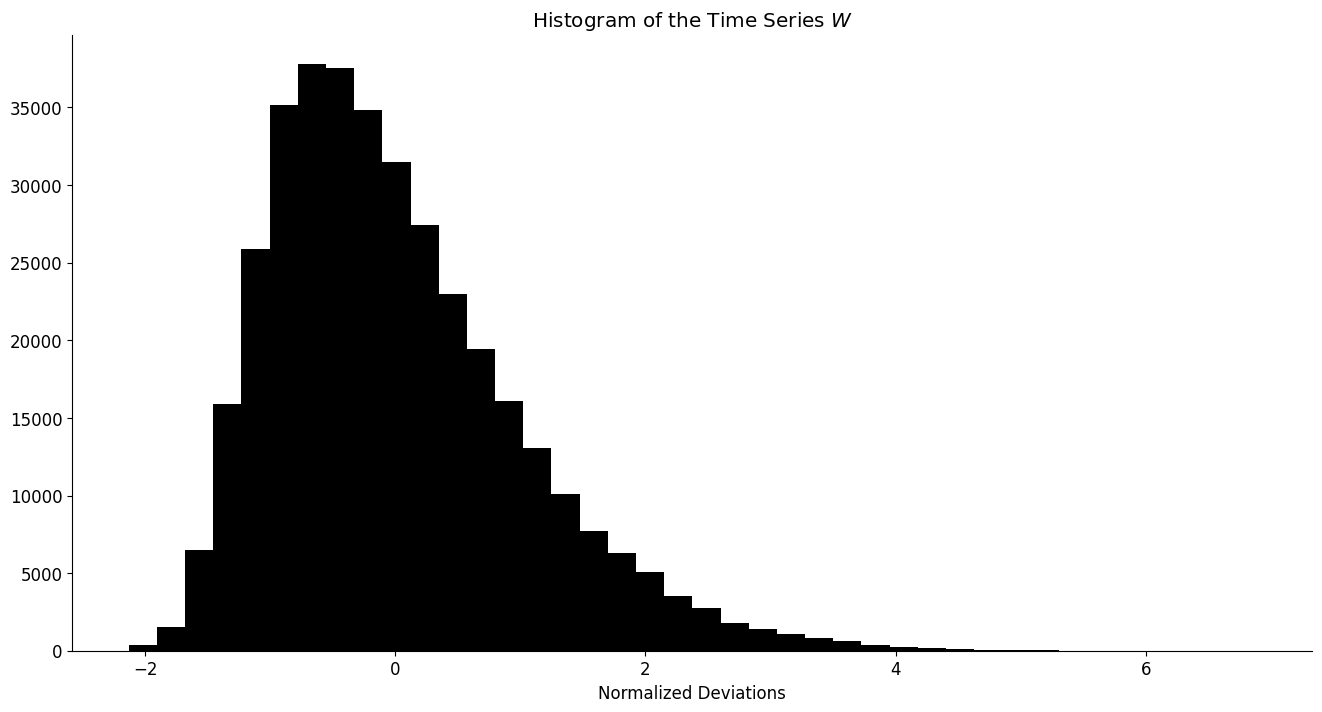

In [15]:
plt.figure(figsize = (16, 8))
plt.hist(W, bins = 40)
plt.xlabel("Normalized Deviations")
plt.title("Histogram of the Time Series $W$")
plt.show()

We also look at the month-wise boxplots for the time series $W$.

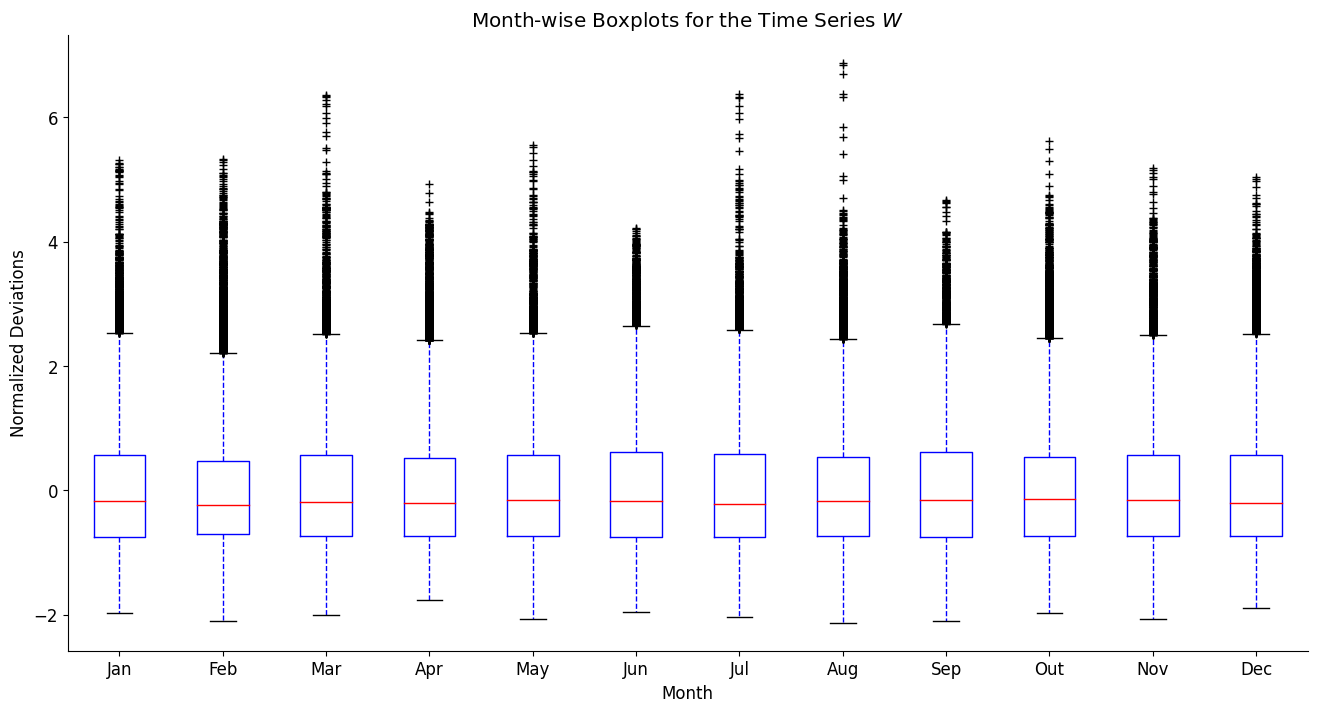

In [16]:
plt.figure(figsize = (16, 8))
bp2 = plt.boxplot([W[W.index.month == m] for m in range(1, 13)], labels = months_names, vert = True)
plt.setp(bp2["medians"], color = "red")
plt.setp(bp2["boxes"], color = "blue")
plt.setp(bp2["whiskers"], color = "blue", linestyle = "--")
plt.setp(bp2["fliers"], color = "black", marker = "+")
plt.xlabel("Month")
plt.ylabel("Normalized Deviations")
plt.title("Month-wise Boxplots for the Time Series $W$")
plt.show()

### 2.2. Analyzing Stationarity of the Time Series $W$ by Means of the Augmented Dickey-Fuller (ADF) Test

[trecho abaixo copiado de $\textit{Introduction to Time Series Forecasting With Python}$, de Jason Brownlee]:

Statistical tests make strong assumptions about your data. They can only be used to inform the degree to which a null hypothesis can be rejected or fail to be reject. The result must be interpreted for a given problem to be meaningful. Nevertheless, they can provide a quick check and confirmatory evidence that your time series is stationary or non-stationary.

The Augmented Dickey-Fuller Test is a type of statistical test called a unit root test. The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values. The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternative hypothesis (rejecting the null hypothesis) is that the time series is stationary.

$\textbf{Null Hypothesis (H0):}$ If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

$\textbf{Alternative Hypothesis (H1):}$ The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

$\textbf{p-value > 0.05:}$ Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

$\textbf{p-value $\leq$ 0.05:}$ Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [17]:
# performing Augmented Dickey-Fuller (ADF) Test
print("Results of the Augmented Dickey-Fuller Test\n")
adf_test = adfuller(W, autolag = "AIC") # AIC is the "Akaike Information Criterion"
adf_output = pd.Series(adf_test[0:4], index = ["test statistic:", "p-value:", "number of lags used:", "number of observations used:"])
for key, value in adf_test[4].items():
    adf_output["critical value for the test statistic at the {} level:".format(key)] = value
print(adf_output)

Results of the Augmented Dickey-Fuller Test

test statistic:                                               -49.479463
p-value:                                                        0.000000
number of lags used:                                           89.000000
number of observations used:                               368095.000000
critical value for the test statistic at the 1% level:         -3.430368
critical value for the test statistic at the 5% level:         -2.861548
critical value for the test statistic at the 10% level:        -2.566774
dtype: float64


In view of the result for the p-value, which is certainly different from zero but it is a very small number (computationally represented by "0") and much smaller than an 1% significance level, the null hypotesis is rejected - also note that the test statistic value of approximately -40.8 is much smaller than the value of -3.43 at 1% significance level. In other words, the time series $W$ is stationary.

### 2.3. Checking Autocorrelation for the Time Series $W$

Below we present the lag 1 plot of the time series $W$...

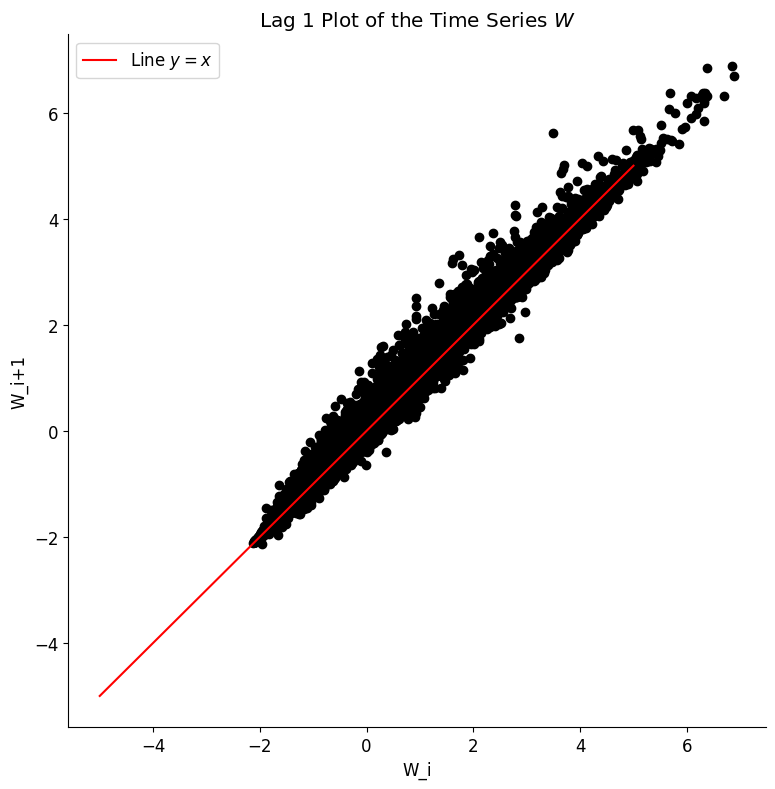

In [18]:
plt.figure(figsize = (9, 9))
lag_plot(W)
plt.xlabel("W_i")
plt.ylabel("W_i+1")
plt.title("Lag 1 Plot of the Time Series $W$")
x_fit = np.linspace(-5, 5, 518)
y_fit = x_fit
plt.plot(x_fit, y_fit, color = "red", label = "Line $y = x$")
plt.legend(loc = "best")
plt.show()

... and the lag 24, 48, 72 and 96 plots of the time series $W$. Note that points get wide and scattered with increasing lag, which implies lesser correlation.

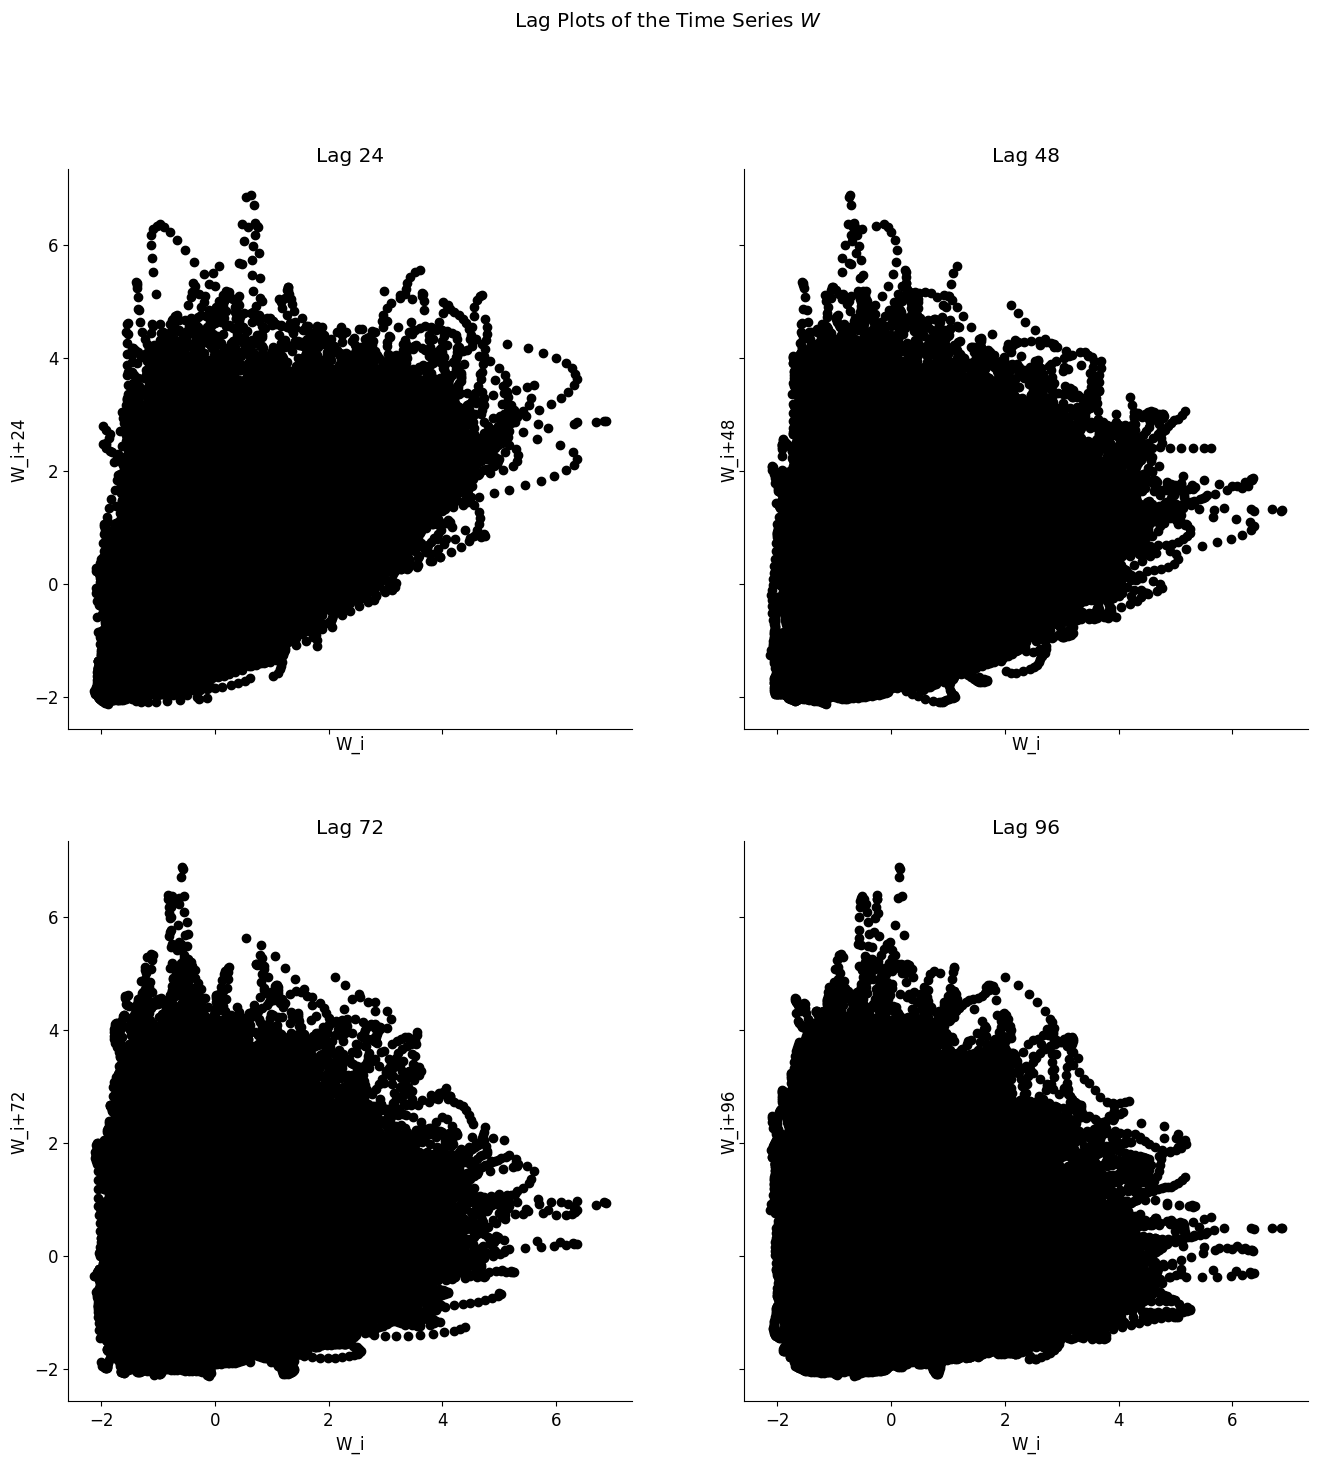

In [19]:
fig, axes = plt.subplots(2, 2, figsize = (16, 16), sharex = True, sharey = True, dpi = 100)
for l, ax in enumerate(axes.flatten()[:4]):
    lag_plot(W, lag = 24*(l+1), ax = ax)
    ax.set_title("Lag " + str(24*(l+1)))
    ax.set_xlabel("W_i")
    ax.set_ylabel("W_i+" + str(24*(l+1)))
fig.suptitle("Lag Plots of the Time Series $W$")
plt.show()

The (sample) autocorrelation function for the time series $W$ is now visualized in order to assess the degree of dependence in the data, wherein the gray horizontal lines on the graph are the bounds $\pm1.96/\sqrt{|\mathcal{D}|}$ (95% confidence bounds).

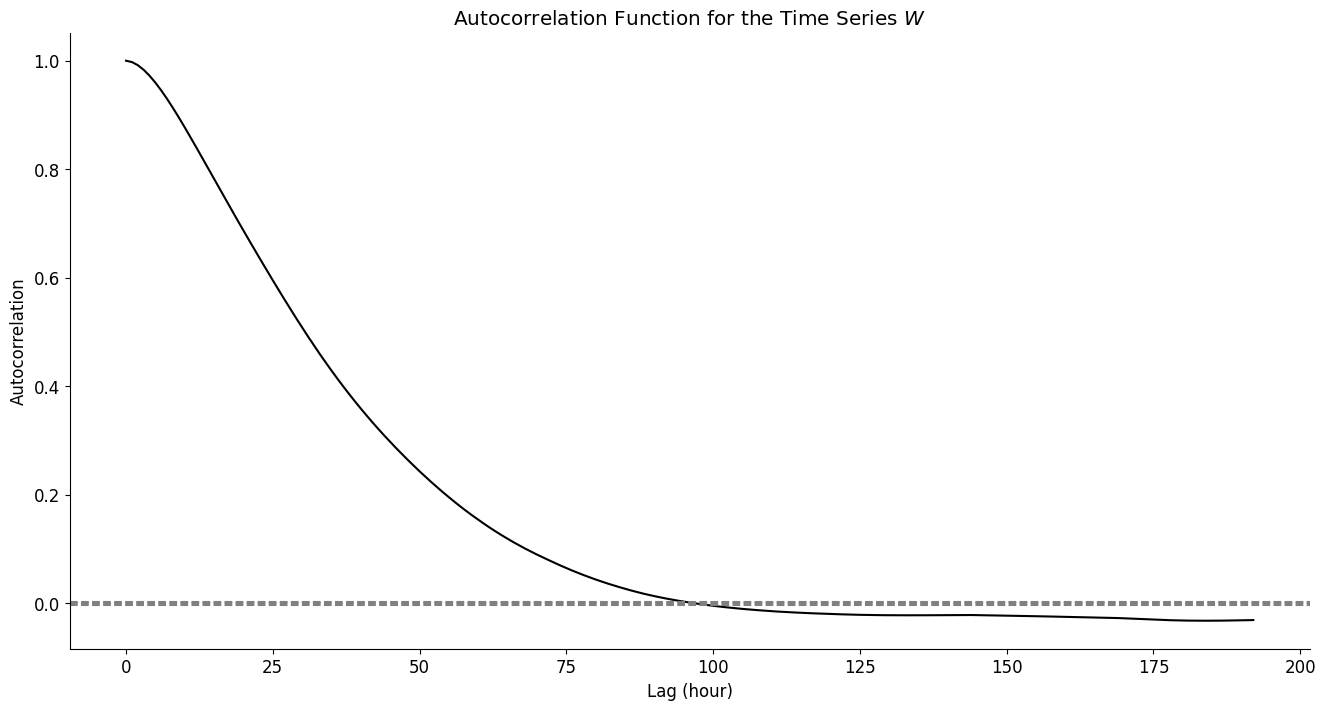

In [20]:
lag_acf = acf(W, nlags = 192, fft = False)
plt.figure(figsize = (16, 8))
plt.plot(lag_acf)
plt.xlabel("Lag (hour)")
plt.ylabel("Autocorrelation")
plt.axhline(y = 0, linestyle = "--", color = "gray")
plt.axhline(y = -1.96/np.sqrt(len(W)), linestyle = "--", color = "gray")
plt.axhline(y = 1.96/np.sqrt(len(W)), linestyle = "--", color = "gray")
plt.title("Autocorrelation Function for the Time Series $W$")
plt.show()

The autocorrelation function is clearly periodic, with period 24 (hours), highlighting a well-defined intraday behaviour of the data. Below we show the hour-wise boxplots for the time series $W$.

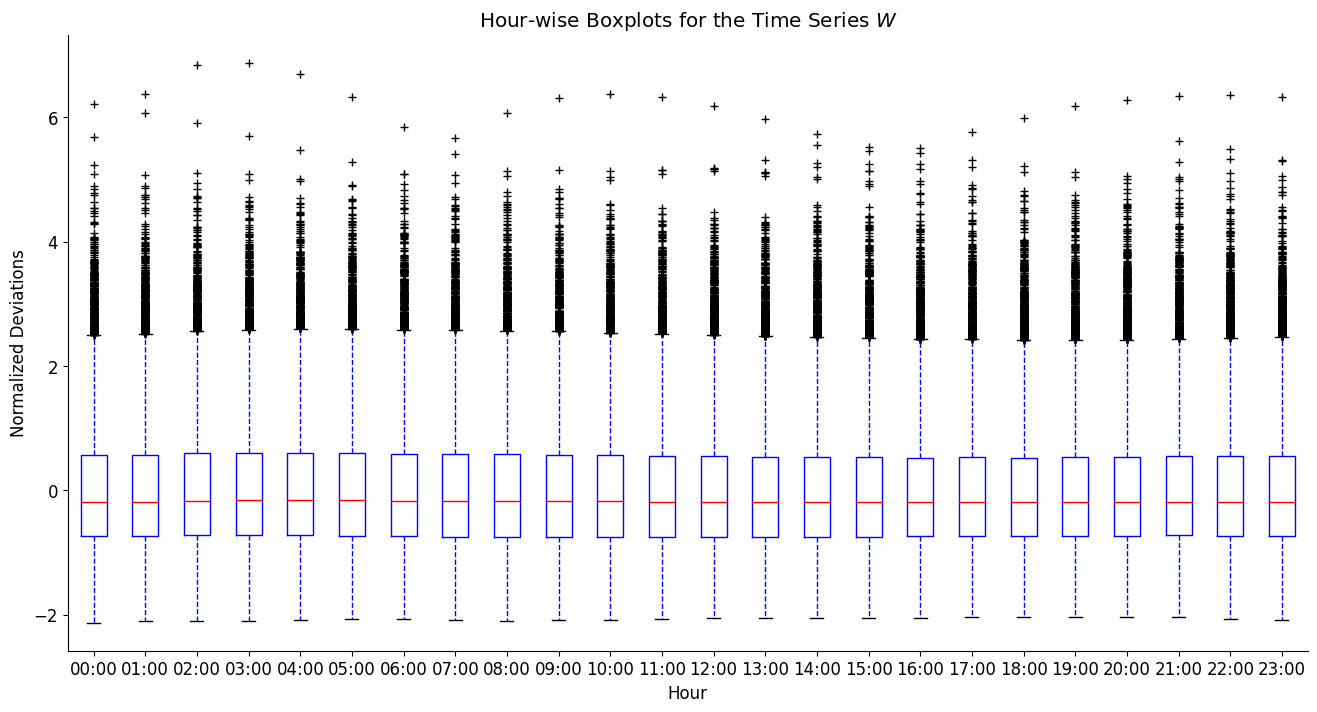

In [21]:
hours_names = ["00:00", "01:00", "02:00", "03:00", "04:00", "05:00", "06:00", "07:00", "08:00", "09:00", "10:00", "11:00", "12:00", "13:00", "14:00", "15:00", "16:00", "17:00", "18:00", "19:00", "20:00", "21:00", "22:00", "23:00"]
plt.figure(figsize = (16, 8))
bp3 = plt.boxplot([W[W.index.hour == h] for h in range(0, 24)], labels = hours_names, vert = True)
plt.setp(bp3["medians"], color = "red")
plt.setp(bp3["boxes"], color = "blue")
plt.setp(bp3["whiskers"], color = "blue", linestyle = "--")
plt.setp(bp3["fliers"], color = "black", marker = "+")
plt.xlabel("Hour")
plt.ylabel("Normalized Deviations")
plt.title("Hour-wise Boxplots for the Time Series $W$")
plt.show()

[trecho abaixo copiado de https://en.wikipedia.org/wiki/Ljung%E2%80%93Box_test]:

We now perform de Ljung-Box Test, which is a type of statistical test of whether any of a group of autocorrelations of a time series are different from zero. Instead of testing randomness at each distinct lag, it tests the "overall" randomness based on a number of lags, and is therefore a portmanteau test (a type of statistical hypothesis test in which the null hypothesis is well specified, but the alternate hypothesis is more loosely specified).

$\textbf{Null Hypothesis (H0):}$ If failed to be rejected, it suggests the data is independently distributed, i.e., the correlations in the population from which the sample is taken are 0, so that any observed correlations in the data result from randomness of the sampling process.

$\textbf{Alternative Hypothesis (H1):}$ The null hypothesis is rejected; it suggests the data is not independently distributed, i.e., they exhibit serial correlation.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (sign of autocorrelations), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (no clear sign of autocorrelations).

$\textbf{p-value > 0.05:}$ Fail to reject the null hypothesis (H0), the data is independently distributed.

$\textbf{p-value $\leq$ 0.05:}$ Reject the null hypothesis (H0), the data is not independently distributed.

In [22]:
# performing Ljung-Box Test
print("Results of the Ljung-Box Test\n")
lb_test = acorr_ljungbox(W, lags = 192, boxpierce = False, return_df = True)
print(lb_test)

Results of the Ljung-Box Test

          lb_stat  lb_pvalue
1    3.664032e+05        0.0
2    7.286169e+05        0.0
3    1.084619e+06        0.0
4    1.432782e+06        0.0
5    1.771828e+06        0.0
..            ...        ...
188  8.003469e+06        0.0
189  8.003834e+06        0.0
190  8.004195e+06        0.0
191  8.004550e+06        0.0
192  8.004900e+06        0.0

[192 rows x 2 columns]


In view of the result for the p-value, which is certainly different from zero but it is a very small number (computationally represented by "0") and much smaller than an 1% significance level, the null hypotesis is rejected (as expected by the previous graphical evidences). In other words, the time series $W$ exhibit serial correlation.

## 3. Analyzing Extreme Values from the Times Series $W$

First of all, we import the packages to be used to perform the extreme values analyses.

In [23]:
# installing POT R package (package that the software uses by means of rpy2 to compute GPD estimates)
from rpy2.robjects.packages import importr
import rpy2.robjects.packages as rpackages

base = importr("base")
utils = importr("utils")
utils.chooseCRANmirror(ind = 1)
utils.install_packages("POT") #installing POT package

# importing the "thresholdmodeling" package
from thresholdmodeling import thresh_modeling

plt.style.use('default')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=["black"])
plt.rcParams.update({'font.size': 12})
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

[trecho abaixo copiado de $\textit{Modelling Environmental Extremes}$, de Lee Fawcett e Dave Walshaw, e de $\textit{Peaks-Over-Threshold Modelling of Environmental Data}$, de Esther Bommier]:

In the following subsections we are going to use de "Peaks Over Threshold" (POT) method for determining whether an observation is extreme. This method needs the determination of a threshold $u$ which is neither too high (to get enough observations) nor too low (not to take into account non-extreme values). Once determined, all values greater than such threshold are considered:
for a fixed threshold $u$, we construct the series of exceedances $W_{i}-u$, i.e.,

$$E(u)=\{W_{i}-u,i\in\mathcal{D}:W_{i}>u\}=\{W_{i}-u,i\in\mathcal{E}(u)\}$$

wherein $\mathcal{E}(u)$ denotes the subset of indexes in $\mathcal{D}$ for which $W_{i}>u$.

For $u$ large enough, the distribution of exceedances above $u$ is approximated by a Generalized Pareto Distribution (GPD) $G_{\xi,\sigma_{u}}(x-u)$:

$$G_{\xi,\sigma_{u}}(x-u)=Pr(X<x|X>u)=\left\{\begin{array} {ll}
1-\left[1+\xi\left(\dfrac{x-u}{\sigma_{u}}\right)\right]^{-1/\xi} & \mbox{if } \xi\neq0\\
1-\exp\left[-\left(\dfrac{x-u}{\sigma_{u}}\right)\right] & \mbox{if } \xi=0
\end{array} \right.
$$

wherein $x\geq{}u$ if $\xi\geq0$ and $u\leq{}x\leq{}u-\dfrac{\sigma_{u}}{\xi}$ if $\xi<0$.

$\xi$ is called $\textit{shape parameter}$ and may assume values on $\mathbb{R}$. It is dominating in determining the behaviour of the tail. If $\xi<0$, the distribution of excesses has an upper bound at $u-\dfrac{\sigma_{u}}{\xi}$, while on the contrary if $\xi>0$, the distribution has no upper limit.

$\sigma_{u}$ is called $\textit{scale parameter}$ and and may assume values on $\mathbb{R}_{+}^{*}$ (strictly positive real numbers). The index $u$ is used to emphazise its dependence on the threshold.

The POT method requires the exceedances to be mutually independent. However, for the temperatures data, threshold exceedances are seen to occur in groups: an extremely warm day is likely to be followed by another. In order to deal with independent variables and be able to apply the POT method, a commonly used technique is declustering, which filters the dependent observations to obtain a set of threshold excesses that are approximately independent.

Since our data are hourly, we perform the declusterization by taking the maximum daily.

### 3.1. The Maximum Daily Normalized Deviation Time Series ($W$_max_daily)

In [24]:
# constructing the maximum daily normalized deviation time series from the time series W
days = int(len(W[1:])/24) # number of days from 1980-12-31 to 2019-12-31
W_max_daily = pd.Series() # creating an empty time series
for d in range(0, days):
    W_max_daily[W[(1+24*d):(25+24*d)].idxmax()] = W[(1+24*d):(25+24*d)].max()
W_max_daily = W_max_daily.rename("maximum daily normalized deviation")

# Observação: Nós poderíamos ter construído a série do desvio máximo diário com o método .resample:
# W_max_daily = W.resample("24H").max()
# Entretanto, o índice seria modificado: disposto dia-a-dia, sem o registro da hora. Isso não é bom para nosso problema, pois
# após toda a análise a ser feita, queremos ser capazes de voltar à série temporal original X e ver quais são os valores de
# temperatura dos extremos.

C:\Users\fabio\miniconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


The (sample) autocorrelation function for the time series $W$_max_daily is now visualized in order to assess the degree of dependence in the data, wherein the gray horizontal lines on the graph are the bounds $\pm1.96/\sqrt{|\mathcal{D}\_max\_daily|}$ (95% confidence bounds).

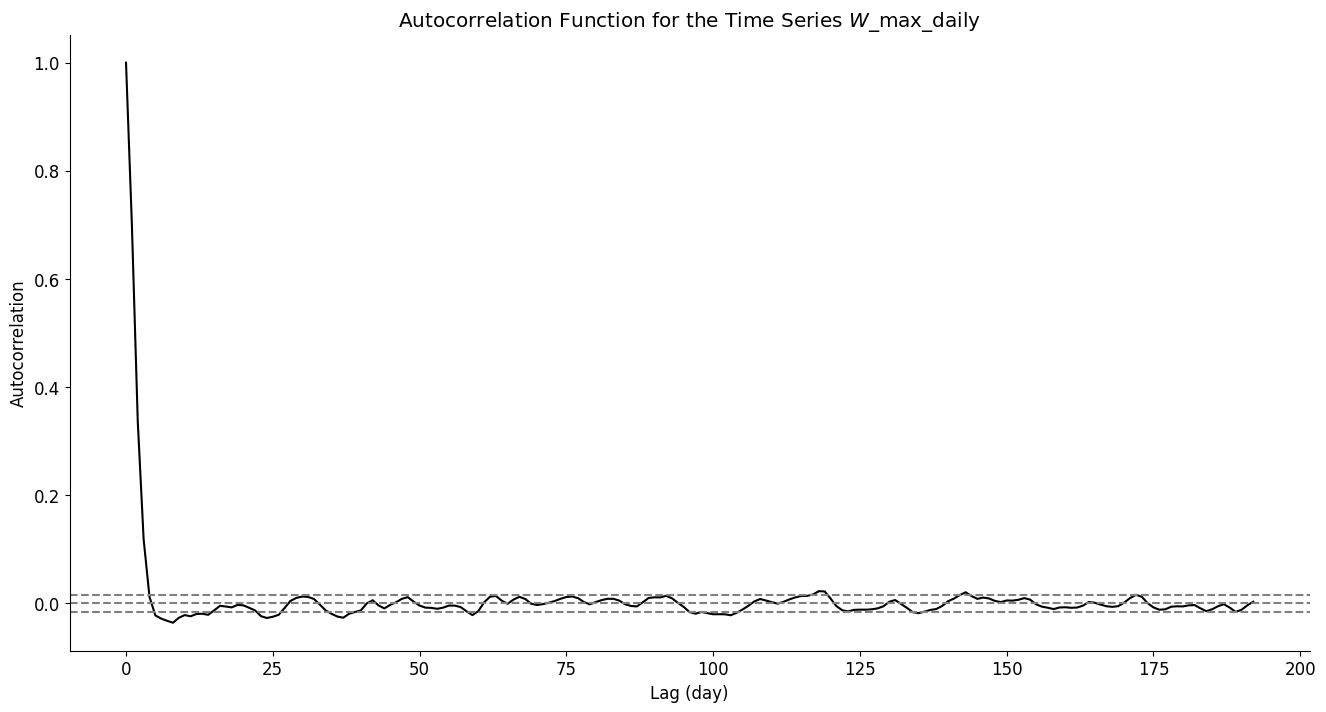

In [25]:
lag_acf = acf(W_max_daily, nlags = 192, fft = False)
plt.figure(figsize = (16, 8))
plt.plot(lag_acf)
plt.xlabel("Lag (day)")
plt.ylabel("Autocorrelation")
plt.axhline(y = 0, linestyle = "--", color = "gray")
plt.axhline(y = -1.96/np.sqrt(len(W_max_daily)), linestyle = "--", color = "gray")
plt.axhline(y = 1.96/np.sqrt(len(W_max_daily)), linestyle = "--", color = "gray")
plt.title("Autocorrelation Function for the Time Series $W$_max_daily")
plt.show()

In [26]:
# performing Ljung-Box Test
print("Results of the Ljung-Box Test\n")
lb_test = acorr_ljungbox(W_max_daily, lags = 192, boxpierce = False, return_df = True)
print(lb_test)

Results of the Ljung-Box Test

         lb_stat  lb_pvalue
1    7521.215391        0.0
2    9256.722804        0.0
3    9471.331534        0.0
4    9473.402534        0.0
5    9481.303665        0.0
..           ...        ...
188  9906.683348        0.0
189  9910.797319        0.0
190  9913.111232        0.0
191  9913.354175        0.0
192  9913.460832        0.0

[192 rows x 2 columns]


To select an approriate threshold in the POT method, we use a graphical method introduced by Davison and Smith (1990),  based on the mean of the GPD:

Suppose the GPD with parameters $\xi<1$ and $\sigma_{u_{0}}$ is valid as a model for the excesses of a threshold $u_{0}$ generated by a series. The expected value of such GPD is given by

$$\mathbb{E}(X-u_{0}|X>u_{0})=\dfrac{\sigma_{u_{0}}}{1-\xi}.$$

The threshold stability property of the GPD means that if the GPD is a valid model for excesses over some threshold $u_{0}$, then it is valid for excesses over all thresholds $u>u_{0}$. Hence, for $u>u_{0}$,

$$\mathbb{E}(X-u|X>u)=\dfrac{\sigma_{u}}{1-\xi}=\dfrac{\sigma_{u_{0}}+\xi{}u}{1-\xi}.$$

Thus, for all $u>u_{0}$, $\mathbb{E}(X-u|X>u)$ is a linear function of $u$. Furthermore, $\mathbb{E}(X-u|X>u)$ is the mean of the excesses of the threshold $u$, and can be estimated by the sample mean of the threshold excesses. This leads to the mean residual life plot defined by the locus of points $\{(u,e(u)):u<x_{max}\}$, wherein

$$e(u)=\dfrac{1}{|\mathcal{E}(u)|}\sum_{i\in\mathcal{E}(u)}(W_{i}-u)$$

and $x_{max}$ the maximum value achieved by the time series. 

It means that for a range of thresholds $u$, we identify the corresponding mean threshold excess, then plot this mean threshold excess against $u$, and look for the value $u_{0}$ above which we can see linearity in the plot. Indeed, if the GPD assumption is correct, then the plot should follow a straight line with intercept $\dfrac{\sigma_{u_{0}}}{1-\xi}$ and slope $\dfrac{\xi}{1-\xi}$ (before it becomes unstable due to the few very high data points). Confidence intervals can be added to this plot as the empirical mean can be supposed to be normally distributed (Central Limit Theorem). However, normality does not hold anymore for high thresholds as there are less and less excesses. Moreover, by construction, this plot always converge to the point $(x_{max},0)$.

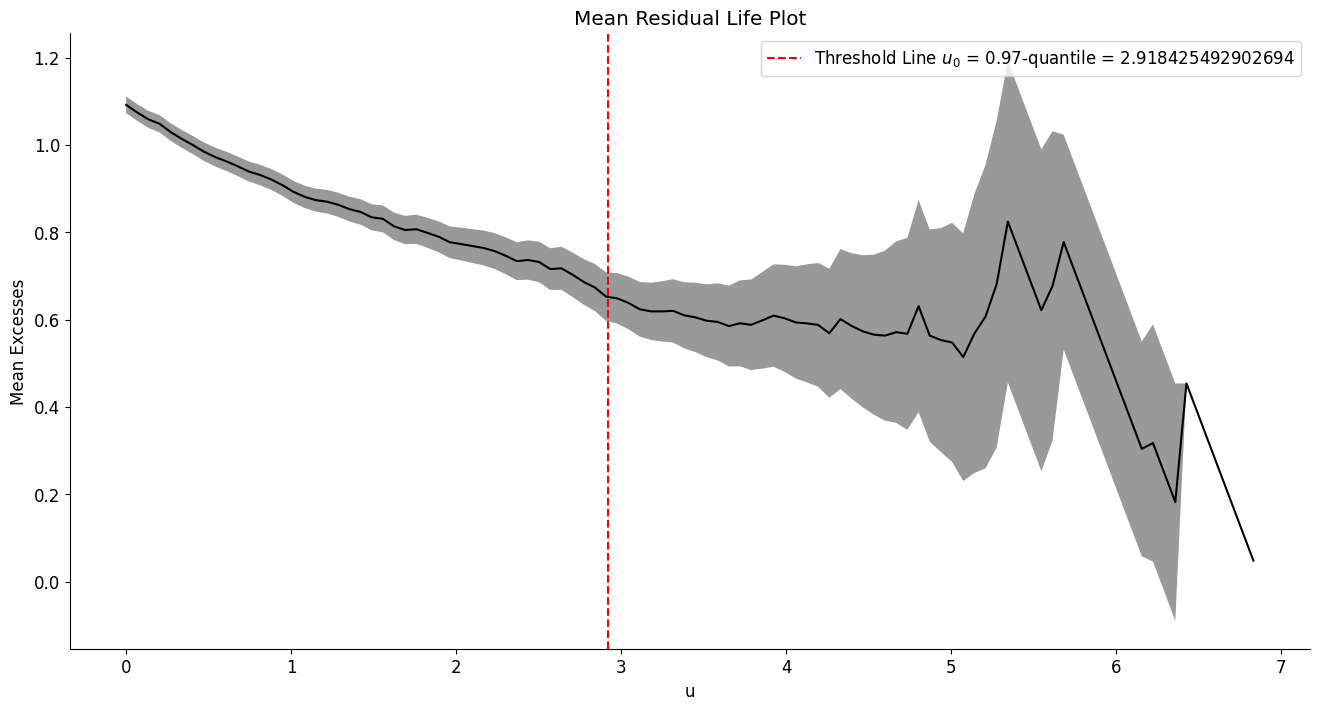

In [117]:
# plotting the mean excess (mean residual life) function with a confidence level of 5%
plt.figure(figsize = (16, 8))
plt.axvline(W_max_daily.quantile(0.97), color = "red", linestyle = "--", label = "Threshold Line $u_{0}$ = 0.97-quantile = " + str(W_max_daily.quantile(0.97)))
plt.legend(loc = "best")
thresh_modeling.MRL(W_max_daily, 0.05)
plt.show()

Another graphical method which is widely used to determine the threshold $u$ is the parameter stability plot. The idea of this plot is that if the exceedances of a high threshold $u_{0}$ follow a GPD with parameters $\xi$ and $\sigma_{u_{0}}$, then for any threshold $u$ such that $u>u_{0}$, the exceedances still follow a GPD with shape parameter $\xi_{u}=\xi$ and scale parameter $\sigma_{u}=\sigma_{u_{0}}+\xi(u−u_{0})$.

Let

$$\sigma^{\ast}=\sigma_{u}+\xi_{u}u.$$

This new parametrization does not depend on $u$ any longer, given that $u_{0}$ is a reasonably high threshold.

The plot is defined by the locus of points

$$\{(u,\xi_{u}):u<x_{max}\} \qquad \mbox{and} \qquad \{(u,\sigma^{\ast}):u<x_{max}\}$$

wherein $x_{max}$ the maximum value achieved by the time series.

Thus, estimates of $\xi_{u}$ and $\sigma^{\ast}$ are constant for all $u>u_{0}$ if $u_{0}$ is a suitable threshold for the asymptotic approximation. The threshold should be chosen at the value where the shape and scale parameters remain constant.

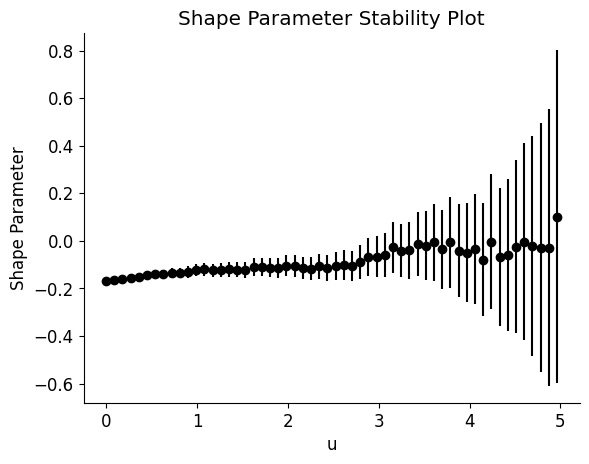

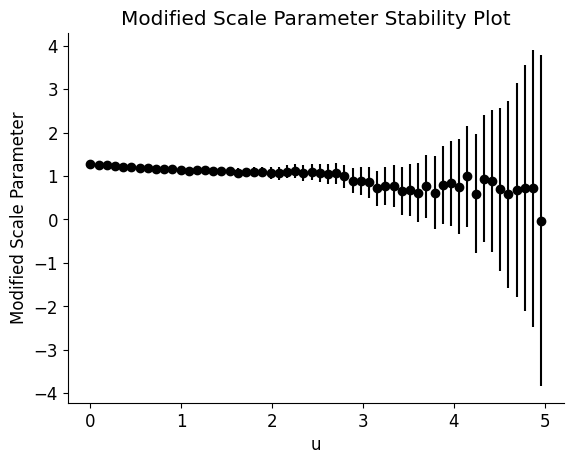

In [118]:
# plotting the shape and modified scale parameters stability with a confidence level of 5%
thresh_modeling.Parameter_Stability_plot(W_max_daily, 0.05)

We see that $u_{0} = 0.97-\mbox{quantile} = 2.9117527455029224$ is an appropriate choice for the threshold. Below we plot the time series $W$_max_daily and the chosen threshold line, $u_{0}=2.9117527455029224$.

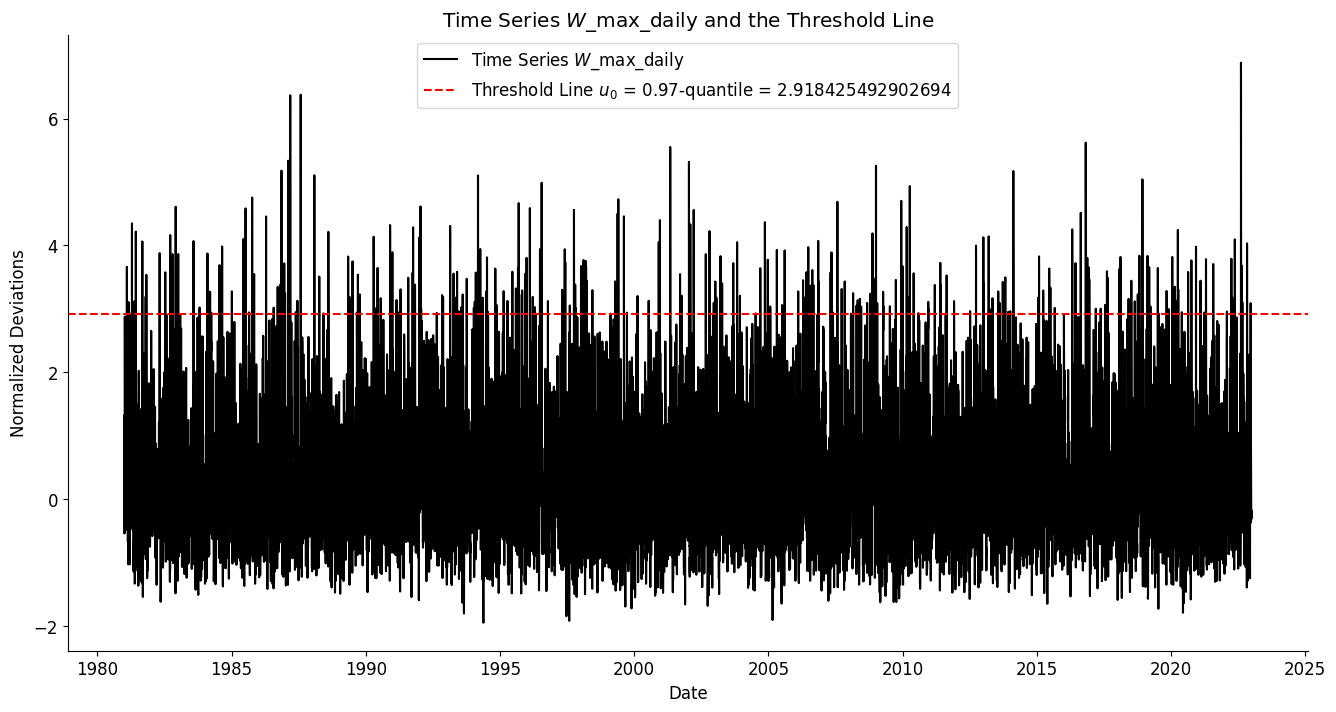

In [119]:
# chosen threshold
u0 = W_max_daily.quantile(0.97)

# plotting the time series W_max_daily and the threshold line
plt.figure(figsize = (16, 8))
plt.plot(W_max_daily, label = "Time Series $W$_max_daily")
plt.axhline(u0, color = "red", linestyle = "--", label = "Threshold Line $u_{0}$ = 0.97-quantile = " + str(u0))
plt.xlabel("Date")
plt.ylabel("Normalized Deviations")
plt.legend(loc = "best")
plt.title("Time Series $W$_max_daily and the Threshold Line")
plt.show()

Below we construct the exceedances over the threshold series, which gives information about the intensities of excesses and the time elapsed between consecutive excesses.

In [120]:
# exceedances over the threshold series
E = W_max_daily[W_max_daily.values > u0] - u0

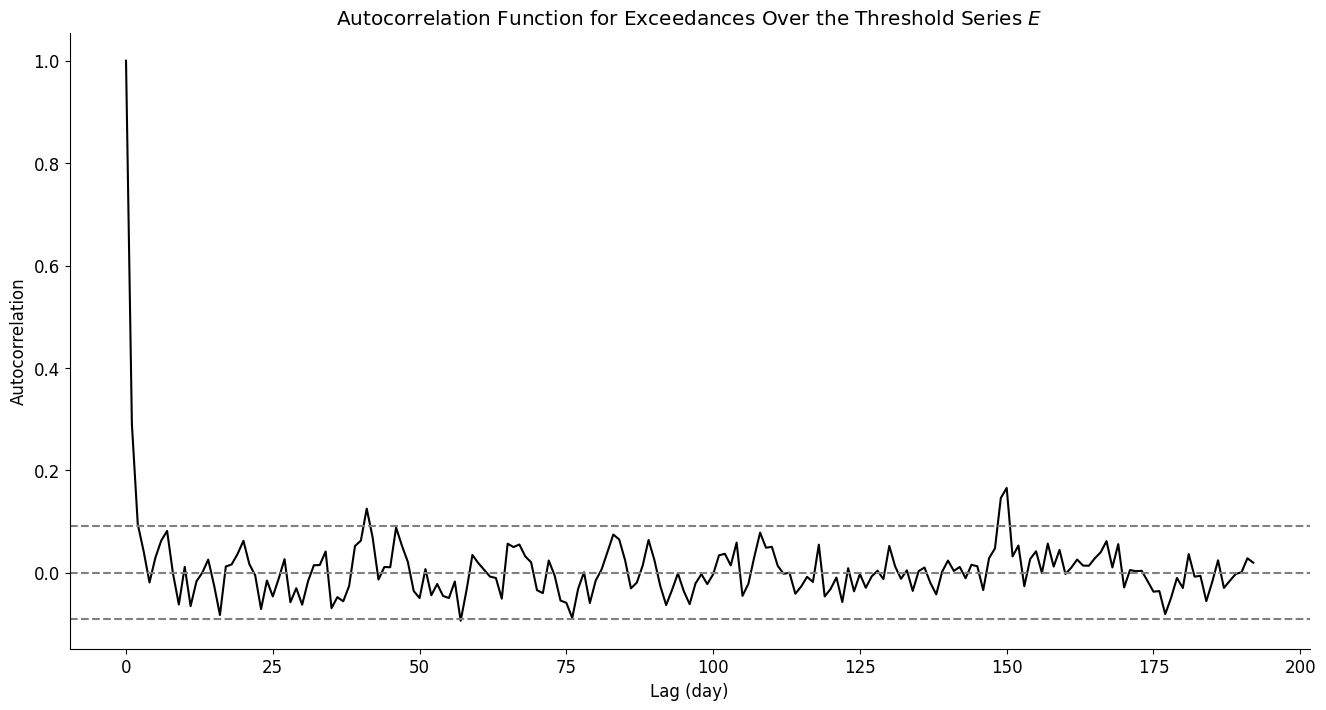

In [121]:
lag_acf = acf(E, nlags = 192, fft = False)
plt.figure(figsize = (16, 8))
plt.plot(lag_acf)
plt.xlabel("Lag (day)")
plt.ylabel("Autocorrelation")
plt.axhline(y = 0, linestyle = "--", color = "gray")
plt.axhline(y = -1.96/np.sqrt(len(E)), linestyle = "--", color = "gray")
plt.axhline(y = 1.96/np.sqrt(len(E)), linestyle = "--", color = "gray")
plt.title("Autocorrelation Function for Exceedances Over the Threshold Series $E$")
plt.show()

In [122]:
# performing Ljung-Box Test
print("Results of the Ljung-Box Test\n")
lb_test = acorr_ljungbox(E, lags = 192, boxpierce = False, return_df = True)
print(lb_test)

Results of the Ljung-Box Test

        lb_stat     lb_pvalue
1     39.106632  4.012786e-10
2     43.296645  3.965090e-10
3     44.117409  1.424954e-09
4     44.287902  5.590387e-09
5     44.687433  1.679426e-08
..          ...           ...
188  238.142373  7.761880e-03
189  238.147125  8.880481e-03
190  238.147829  1.014040e-02
191  238.778399  1.073631e-02
192  239.079996  1.179949e-02

[192 rows x 2 columns]


Now we adjust a Generalized Pareto Distribution (GPD) with the chosen threshold $u_{0}=2.9117527455029224$ to the exceedances.

In [123]:
# fitting the time series W_max_daily data to a GPD model with the chosen threshold u0
thresh_modeling.gpdfit(W_max_daily, u0, "mle")

Estimator: MLE 

 Deviance: 517.5358 

      AIC: 521.5358 



Varying Threshold: FALSE 



  Threshold Call: 2.91842549290269 

    Number Above: 461 

Proportion Above: 0.0301 



Estimates

   scale     shape  

 0.68316  -0.05767  



Standard Error Type: observed 



Standard Errors

  scale    shape  

0.04319  0.04285  



Asymptotic Variance Covariance

       scale      shape    

scale   0.001866  -0.001335

shape  -0.001335   0.001836



Optimization Information

  Convergence: successful 

  Function Evaluations: 20 

  Gradient Evaluations: 6 





(-0.05766733454287673,
 0.6831614093583126,
 array([-1.9494472 , -1.91999066, -1.90544339, ...,  6.36736046,
         6.37590589,  6.88086764]),
 [0.0015605149875512758,
  0.00247382517156991,
  0.004254408242905239,
  0.00497078823527719,
  0.005083120805299934,
  0.005341424038041609,
  0.005522363493515314,
  0.006315468107831901,
  0.007939599416728615,
  0.008028295157422871,
  0.009463528036174562,
  0.009493306415340186,
  0.010269907619379737,
  0.011778181423425238,
  0.013063699524729078,
  0.013683293357853454,
  0.0177626379643252,
  0.01964107847339447,
  0.020056376267997056,
  0.020555820510493206,
  0.02085321904275661,
  0.022114044008443745,
  0.02352669886692116,
  0.02413067032530325,
  0.024910501969984455,
  0.026156979652725454,
  0.028333755708672026,
  0.029058539030872854,
  0.03015987406205145,
  0.030960383670286085,
  0.031986326710309765,
  0.03289711889666469,
  0.035491236737282605,
  0.037870293061601945,
  0.04166720561441917,
  0.04571409415674976,
  

Estimator: MLE 

 Deviance: 517.5358 

      AIC: 521.5358 



Varying Threshold: FALSE 



  Threshold Call: 2.91842549290269 

    Number Above: 461 

Proportion Above: 0.0301 



Estimates

   scale     shape  

 0.68316  -0.05767  



Standard Error Type: observed 



Standard Errors

  scale    shape  

0.04319  0.04285  



Asymptotic Variance Covariance

       scale      shape    

scale   0.001866  -0.001335

shape  -0.001335   0.001836



Optimization Information

  Convergence: successful 

  Function Evaluations: 20 

  Gradient Evaluations: 6 





C:\Users\fabio\miniconda3\lib\site-packages\thresholdmodeling\thresh_modeling.py:194: RuntimeWarning: invalid value encountered in double_scalars
  CI_qq_high.append(threshold + ((scale/shape)*(((1-((F2)/(1)))**-shape) - 1)))
C:\Users\fabio\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


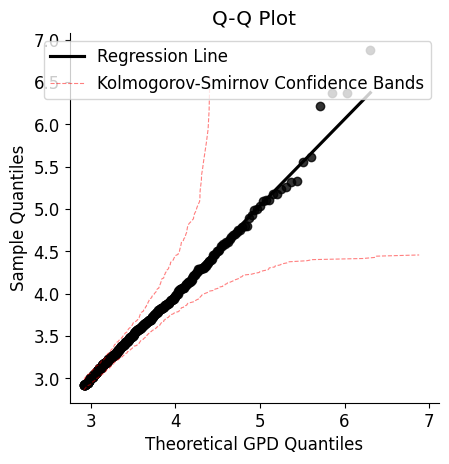

Estimator: MLE 

 Deviance: 517.5358 

      AIC: 521.5358 



Varying Threshold: FALSE 



  Threshold Call: 2.91842549290269 

    Number Above: 461 

Proportion Above: 0.0301 



Estimates

   scale     shape  

 0.68316  -0.05767  



Standard Error Type: observed 



Standard Errors

  scale    shape  

0.04319  0.04285  



Asymptotic Variance Covariance

       scale      shape    

scale   0.001866  -0.001335

shape  -0.001335   0.001836



Optimization Information

  Convergence: successful 

  Function Evaluations: 20 

  Gradient Evaluations: 6 





C:\Users\fabio\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


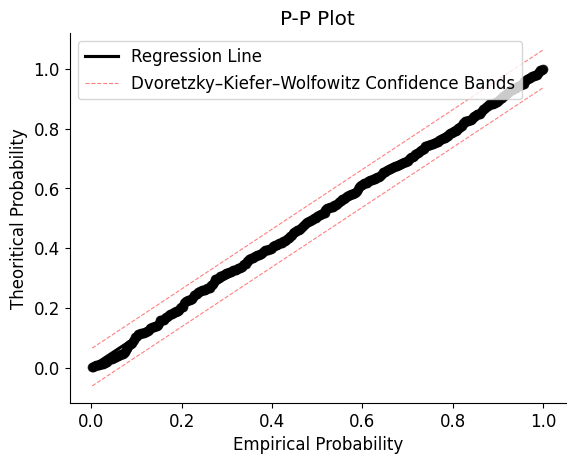

Estimator: MLE 

 Deviance: 517.5358 

      AIC: 521.5358 



Varying Threshold: FALSE 



  Threshold Call: 2.91842549290269 

    Number Above: 461 

Proportion Above: 0.0301 



Estimates

   scale     shape  

 0.68316  -0.05767  



Standard Error Type: observed 



Standard Errors

  scale    shape  

0.04319  0.04285  



Asymptotic Variance Covariance

       scale      shape    

scale   0.001866  -0.001335

shape  -0.001335   0.001836



Optimization Information

  Convergence: successful 

  Function Evaluations: 20 

  Gradient Evaluations: 6 





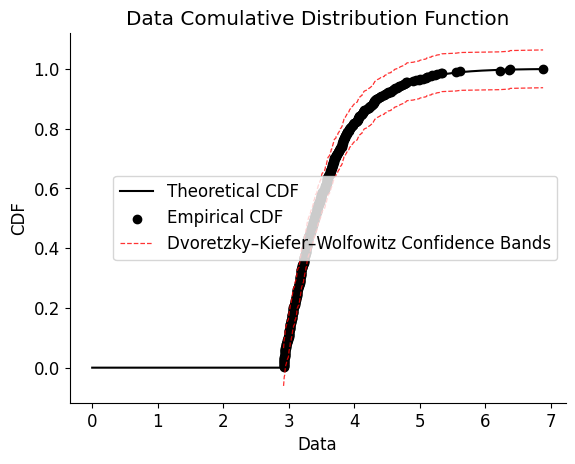

In [124]:
# model checking (empirical versus model): plotting quantile-quantile, probability-probability and cumulative-cumulative 
# functions with the chosen threshold u0 and with a confidence level of 5%
thresh_modeling.qqplot(W_max_daily, u0, "mle", 0.05)
thresh_modeling.ppplot(W_max_daily, u0, "mle", 0.05)
thresh_modeling.gpdcdf(W_max_daily, u0, "mle", 0.05)

### 3.2. The Exceedances Over the Threshold Series ($E$): Intensities of Excesses and Time Elapsed Between Consecutive Excesses

[trecho abaixo copiado de https://up-rs-esp.github.io/mkt/]:

We import the package to perform the Mann-Kendall Trend (MK) Test, which is used to analyze time series data for consistently increasing or decreasing trends (monotonic trends).

Falar da Hipótese Nula e Hipótese Alternativa...

In [125]:
import pymannkendall as mk

In [126]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#### 3.2.1. Intensities of Excesses

We now consider the series $E(u_{0})$ with threshold value $u_{0}=2.9117527455029224$ and plot the normalized histogram for such values and the GPD probability density function:

$$h_{\xi,\sigma_{u_{0}}}(x)=\left\{\begin{array} {ll}
\dfrac{1}{\sigma_{u_{0}}}\left[1+\xi\left(\dfrac{x-u_{0}}{\sigma_{u_{0}}}\right)\right]^{-1-1/\xi} & \mbox{if } \xi\neq0\\
\dfrac{1}{\sigma_{u_{0}}}\exp\left[-\left(\dfrac{x-u_{0}}{\sigma_{u_{0}}}\right)\right] & \mbox{if } \xi=0
\end{array} \right.
$$

wherein $x\geq{}u_{0}$ if $\xi\geq0$ and $u_{0}\leq{}x\leq{}u_{0}-\dfrac{\sigma_{u_{0}}}{\xi}$ if $\xi<0$.

<function matplotlib.pyplot.show(close=None, block=None)>

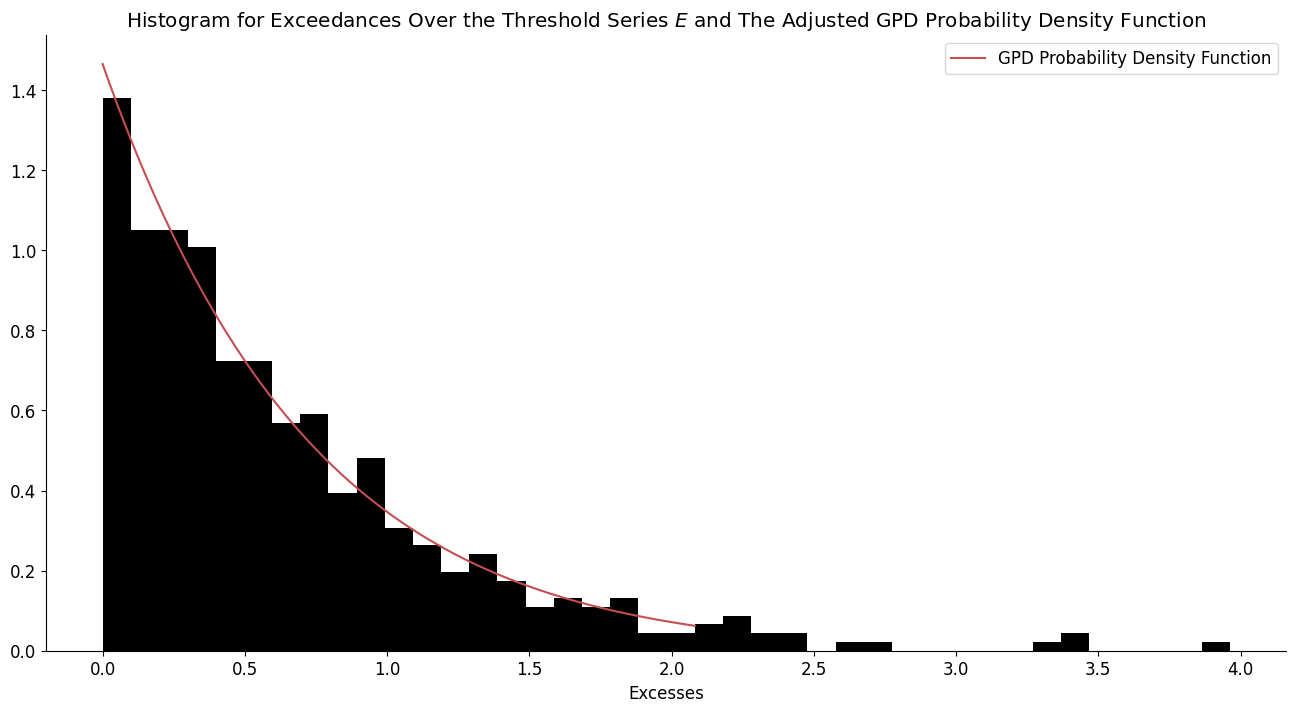

In [127]:
# GPD parameters
xsi = -0.05767 # shape parameter
sigma = 0.68316 # scale parameter

# plotting the normalized histogram for exceedances over the threshold series and the GPD probability density function
plt.figure(figsize = (16, 8))
plt.hist(E, bins = 40, density = True)
plt.xlabel("Excesses")
plt.title("Histogram for Exceedances Over the Threshold Series $E$ and The Adjusted GPD Probability Density Function")
x_fit = np.linspace(2.918, 5, 518)
h_fit = (1/sigma) * (1 + xsi * ((x_fit - u0)/sigma))**(-1-1/xsi) # h(x_fit) = h_fit
plt.plot(x_fit - u0, h_fit, "r", label = "GPD Probability Density Function")
plt.legend(loc = "best")
plt.show

Apply Mann-Kendall Test to check if the intensities have some linear trend.

In [128]:
# performing Mann-Kendall Trend (MK) Test
print("Results of Mann-Kendall Trend Test\n")
mk_test = mk.original_test(E.values, alpha = 0.05)
mk_output = pd.Series([mk_test[0], mk_test[2]], index = ["trend:", "p-value:"])
print(mk_output)

Results of Mann-Kendall Trend Test

trend:      decreasing
p-value:      0.047443
dtype: object


Results of the Linear Regression

slope:                 [-1.2776644269135277e-05]
intercept:                              0.745714
mean squared error:                     0.368522
r2 score:                               0.008652
dtype: object


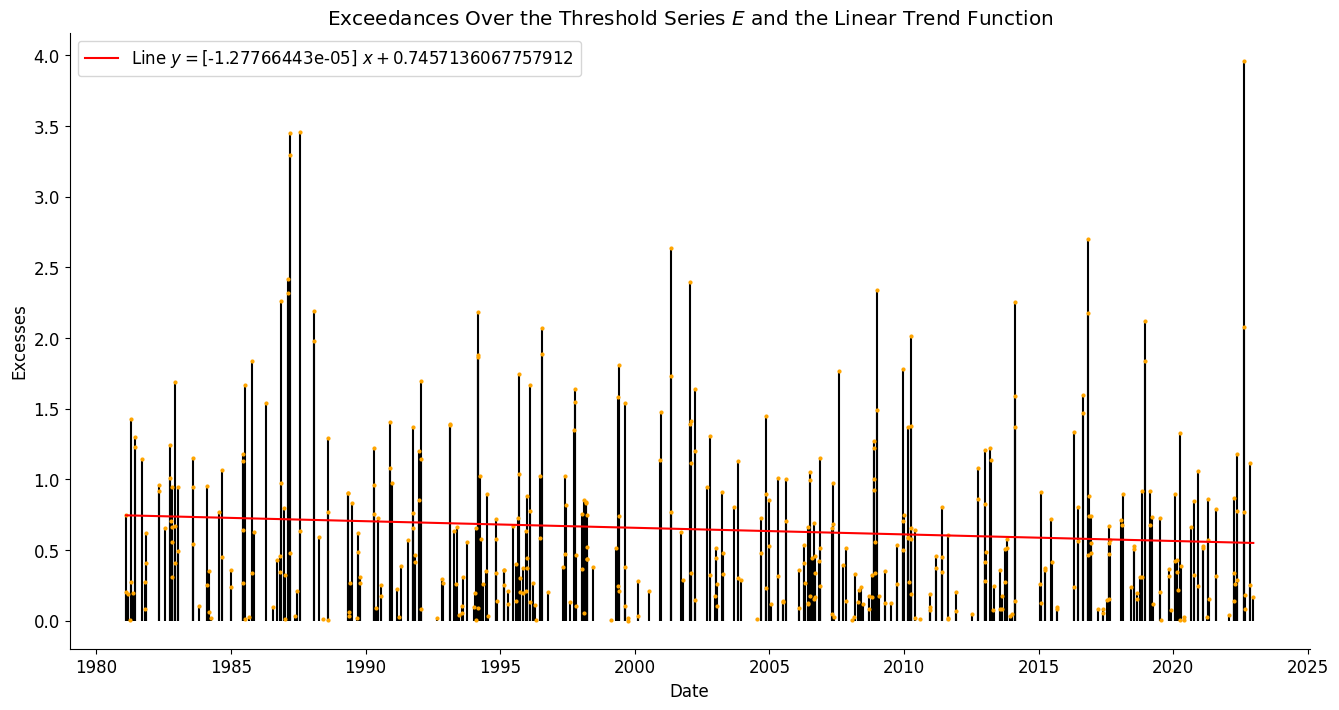

In [129]:
# plotting the exceedances over the threshold series and the linear trend function
plt.figure(figsize = (16, 8))
st1 = plt.stem(E.index, E.values, use_line_collection = True)
plt.setp(st1[0], color = "orange", marker = "o", markersize = 2)
plt.setp(st1[1], color = "black", linestyle = "-")
plt.setp(st1[2], visible = False)
plt.xlabel("Date")
plt.ylabel("Excesses")
plt.title("Exceedances Over the Threshold Series $E$ and the Linear Trend Function")
x = ((E.index - E.index[0]).astype("timedelta64[h]")/24).values.reshape(-1, 1)
y = E.values
model = linear_model.LinearRegression().fit(x, y)
y_fit = model.predict(x)
print("Results of the Linear Regression\n")
lm_output = pd.Series([model.coef_, model.intercept_, mean_squared_error(y, y_fit), r2_score(y, y_fit)], index = ["slope:", "intercept:", "mean squared error:", "r2 score:"])
print(lm_output)
plt.plot(E.index, y_fit, color = "red", label = "Line $y = $" + str(model.coef_) + " $x +$" + str(model.intercept_))
plt.legend(loc = "best")
plt.show()

#### 3.2.2. Time Elapsed Between Consecutive Excesses

And now we look at the time elapsed between consecutive extreme excesses.

Falar da Função Densidade de Probabilidade Exponencial!

Results of the Fit

lambda:             [0.73407506740484]
variance:    [[7.444550332913396e-05]]
dtype: object


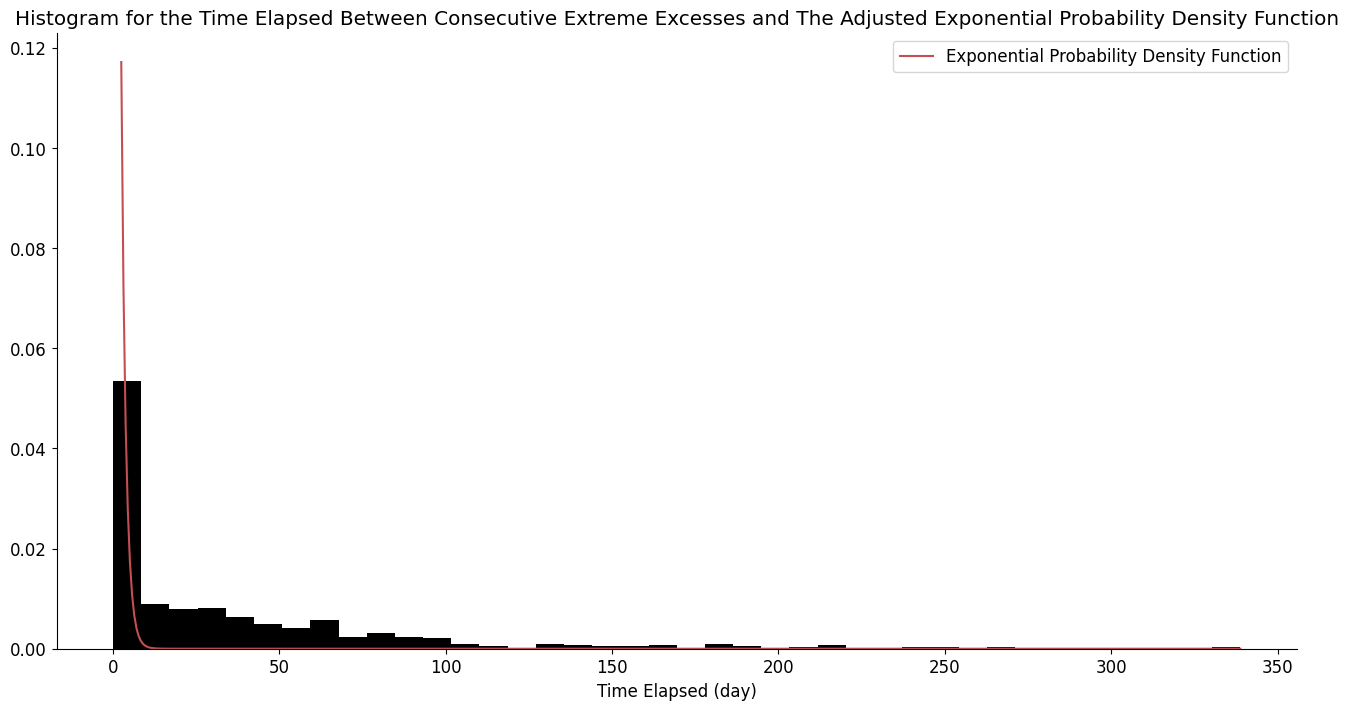

In [130]:
# calculating the time elapsed between consecutive extreme excesses
differences_days = []
total_number_extreme_days = len(E)
for k in range(0, total_number_extreme_days-1):
    differences_days.append(E.index[k+1] - E.index[k])
time_elapsed_days = pd.Series(differences_days)
time_elapsed_days = time_elapsed_days.rename("time elapsed between consecutive extreme excesses")

# plotting the normalized histogram for the time elapsed between consecutive extreme excesses,
# fitting the time elapsed between consecutive extreme excesses data to an exponential probability density function and
# plotting the exponential probability density function
plt.figure(figsize = (16, 8))
plt.hist(time_elapsed_days.astype("timedelta64[h]")/24, bins = 40, density = True)
plt.xlabel("Time Elapsed (day)")
plt.title("Histogram for the Time Elapsed Between Consecutive Extreme Excesses and The Adjusted Exponential Probability Density Function")

from scipy.optimize import curve_fit
t_min = (time_elapsed_days.astype("timedelta64[h]").min())/24
t_max = (time_elapsed_days.astype("timedelta64[h]").max())/24
h = 1/24
I = np.arange(t_min, t_max+h, h, dtype = float)
hist, bin_edges = np.histogram(time_elapsed_days.astype("timedelta64[h]")/24, bins = I, density = True)
x = np.arange(t_min, t_max, h, dtype = float)
y = hist

def f(t, c0):
    return c0 * np.exp(-c0 * t)

print("Results of the Fit\n")
lamb, var = curve_fit(f, x, y)
fit_output = pd.Series([lamb, var], index = ["lambda:", "variance:"])
print(fit_output)

t_fit = np.linspace(2.5, t_max, 518)
f_fit = f(t_fit, lamb) # f(t_fit) = f_fit
plt.plot(t_fit, f_fit, "r", label = "Exponential Probability Density Function")
plt.legend(loc = "best")
plt.show()

Apply Mann-Kendall Test to check if time elapsed between consecutive extreme excesses have some linear trend.

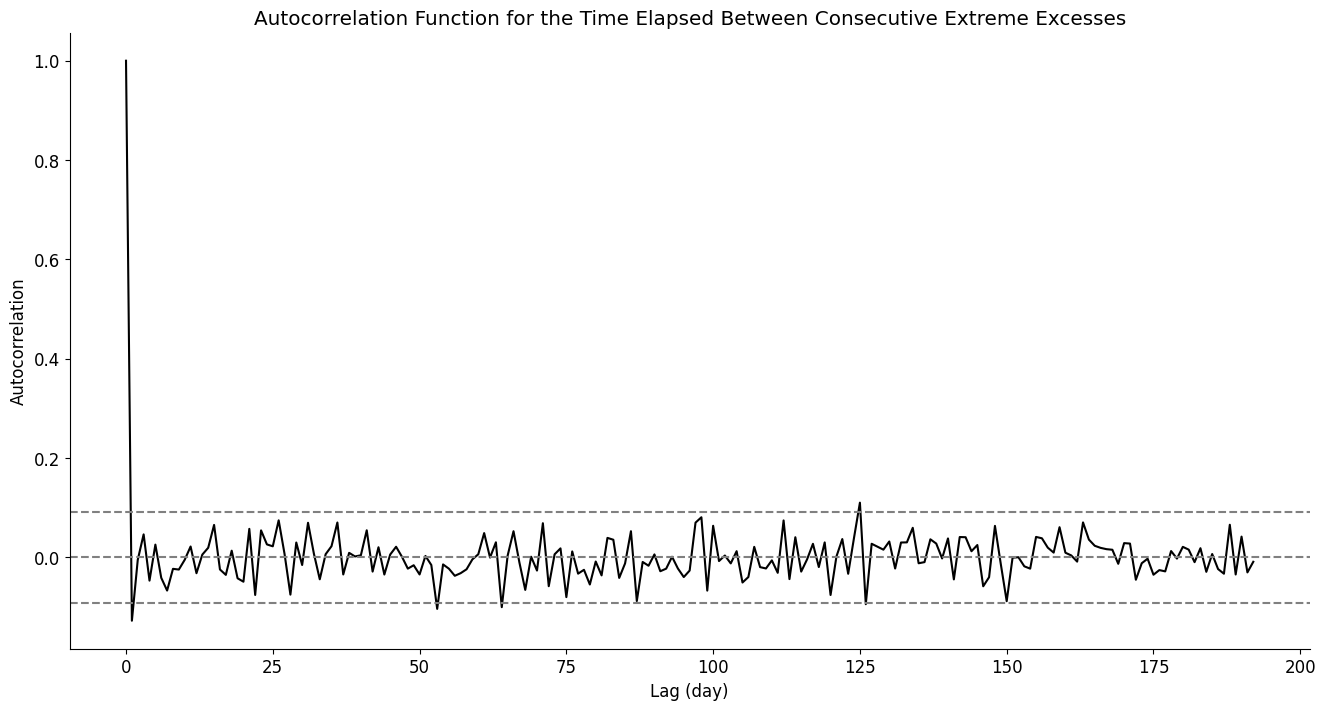

In [131]:
lag_acf = acf(time_elapsed_days, nlags = 192, fft = False)
plt.figure(figsize = (16, 8))
plt.plot(lag_acf)
plt.xlabel("Lag (day)")
plt.ylabel("Autocorrelation")
plt.axhline(y = 0, linestyle = "--", color = "gray")
plt.axhline(y = -1.96/np.sqrt(len(time_elapsed_days)), linestyle = "--", color = "gray")
plt.axhline(y = 1.96/np.sqrt(len(time_elapsed_days)), linestyle = "--", color = "gray")
plt.title("Autocorrelation Function for the Time Elapsed Between Consecutive Extreme Excesses")
plt.show()

In [132]:
# performing Ljung-Box Test
print("Results of the Ljung-Box Test\n")
lb_test = acorr_ljungbox(time_elapsed_days, lags = 192, boxpierce = False, return_df = True)
print(lb_test)

Results of the Ljung-Box Test

        lb_stat  lb_pvalue
1      7.511944   0.006129
2      7.522696   0.023252
3      8.527126   0.036286
4      9.540908   0.048913
5      9.852002   0.079539
..          ...        ...
188  173.173859   0.773691
189  174.096329   0.774324
190  175.479979   0.767396
191  176.195764   0.771444
192  176.256026   0.785889

[192 rows x 2 columns]


In [133]:
# performing Mann-Kendall Trend (MK) Test
print("Results of Mann-Kendall Trend Test\n")
mk_test = mk.original_test(time_elapsed_days.astype("timedelta64[h]")/24, alpha = 0.05)
mk_output = pd.Series([mk_test[0], mk_test[2]], index = ["trend:", "p-value:"])
print(mk_output)

Results of Mann-Kendall Trend Test

trend:      no trend
p-value:     0.64178
dtype: object


Results of the Linear Regression

slope:                 [-0.009108556340263793]
intercept:                           35.333439
mean squared error:                2373.042109
r2 score:                             0.000616
dtype: object


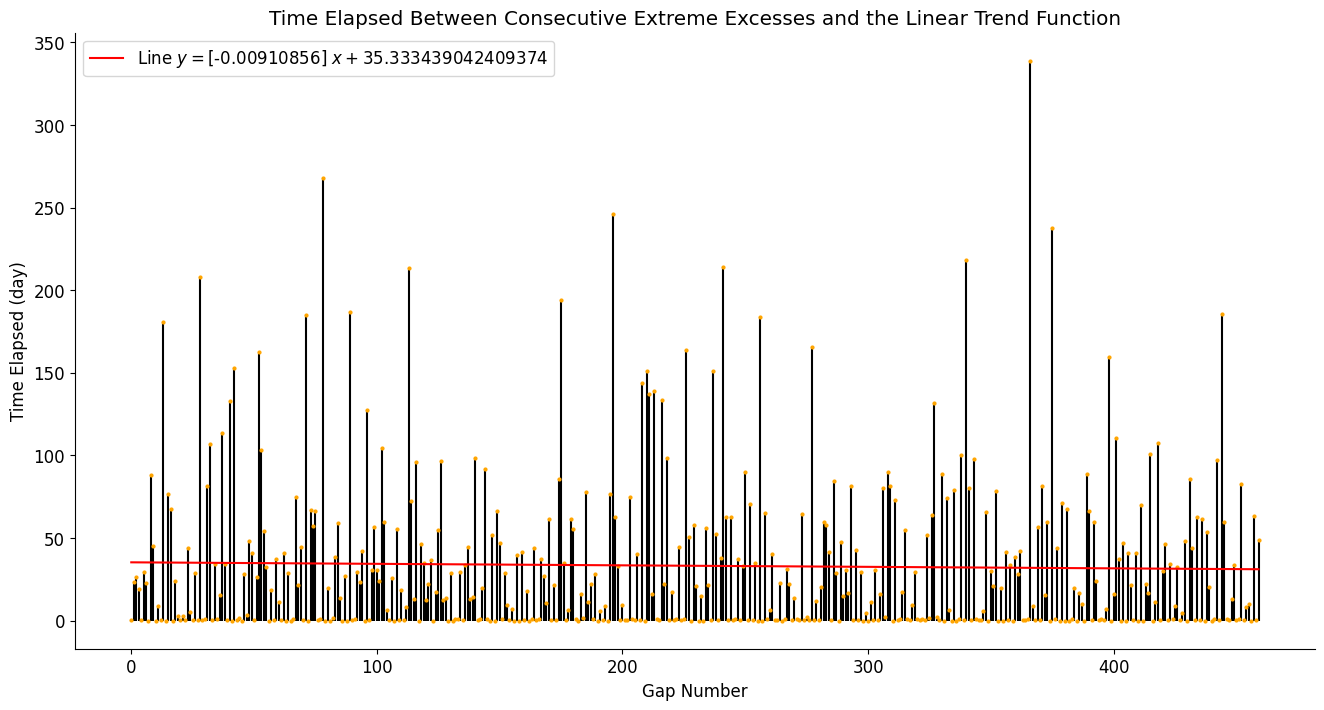

In [134]:
# plotting the time elapsed between consecutive extreme excesses and the linear trend function
plt.figure(figsize = (16, 8))
st2 = plt.stem(time_elapsed_days.index, time_elapsed_days.astype("timedelta64[h]").values/24, use_line_collection = True)
plt.setp(st2[0], color = "orange", marker = "o", markersize = 2)
plt.setp(st2[1], color = "black", linestyle = "-")
plt.setp(st2[2], visible = False)
plt.xlabel("Gap Number")
plt.ylabel("Time Elapsed (day)")
plt.title("Time Elapsed Between Consecutive Extreme Excesses and the Linear Trend Function")
x = (time_elapsed_days.index - time_elapsed_days.index[0]).values.reshape(-1, 1)
y = (time_elapsed_days.astype("timedelta64[h]").values)/24
model = linear_model.LinearRegression().fit(x, y)
y_fit = model.predict(x)
print("Results of the Linear Regression\n")
lm_output = pd.Series([model.coef_, model.intercept_, mean_squared_error(y, y_fit), r2_score(y, y_fit)], index = ["slope:", "intercept:", "mean squared error:", "r2 score:"])
print(lm_output)
plt.plot(time_elapsed_days.index, y_fit, color = "red", label = "Line $y = $" + str(model.coef_) + " $x +$" + str(model.intercept_))
plt.legend(loc = "best")
plt.show()

### 3.3. Return Level for a Given Return Period

We now calculate the 5-year return level, the level that is exceeded on average once every $5\times365$ observations.

The return value for the given return period is 5.361213205788644 ± 0.27848279786548724


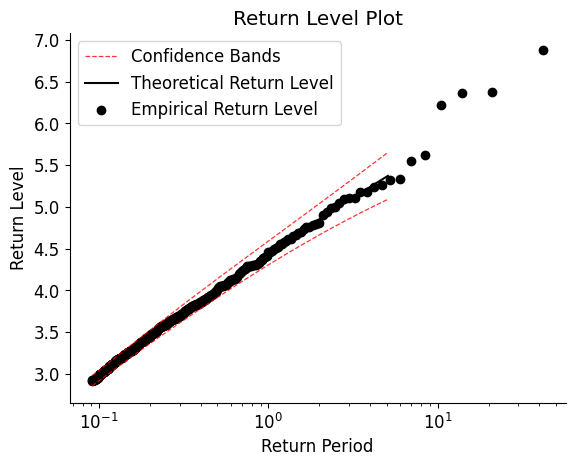

In [135]:
# parameters
block_size = 365 # number of days in the block/number of observations per year
N = 5 # number of years of interest
return_period = N * block_size # N–year return period

# N–year return level for the time series W_max_daily with a confidence level of 5%
thresh_modeling.return_value(W_max_daily, u0, 0.05, block_size, return_period, "mle")

### 3.4. Extreme Maximum Days and Extreme Maximum Events

#### 3.4.1. Extreme Maximum Days

In [136]:
i = E.index
X_e = pd.Series("NaN", index = i, dtype = float, name = "extreme maximum temperatures")
for i in X_e.index:
    X_e[i] = X[i]

print("From 1980-12-31 to 2019-12-31 there are {} extreme maximum temperatures:\n".format(len(X_e)))
for i in X_e.index:
    print("Height of {:.2f}m in {}.".format(X_e[i], i))

From 1980-12-31 to 2019-12-31 there are 461 extreme maximum temperatures:

Height of 2.37m in 1981-02-06 23:00:00.
Height of 2.58m in 1981-02-07 05:00:00.
Height of 2.60m in 1981-03-02 13:00:00.
Height of 2.55m in 1981-03-29 02:00:00.
Height of 3.57m in 1981-04-17 12:00:00.
Height of 3.02m in 1981-04-18 00:00:00.
Height of 3.26m in 1981-05-17 05:00:00.
Height of 3.76m in 1981-06-08 22:00:00.
Height of 3.72m in 1981-06-09 00:00:00.
Height of 3.71m in 1981-09-05 10:00:00.
Height of 2.95m in 1981-10-20 21:00:00.
Height of 2.86m in 1981-10-21 00:00:00.
Height of 3.01m in 1981-10-29 23:00:00.
Height of 3.10m in 1981-10-30 03:00:00.
Height of 3.27m in 1982-04-28 23:00:00.
Height of 3.29m in 1982-04-29 01:00:00.
Height of 3.42m in 1982-07-14 14:00:00.
Height of 3.58m in 1982-09-19 23:00:00.
Height of 3.70m in 1982-09-20 02:00:00.
Height of 3.11m in 1982-10-14 07:00:00.
Height of 2.95m in 1982-10-16 23:00:00.
Height of 3.06m in 1982-10-17 03:00:00.
Height of 3.11m in 1982-10-19 23:00:00.
Heigh

Let us look at the month-wise boxplots for the extreme maximum temperatures series from 1980-12-31 to 2019-12-31.

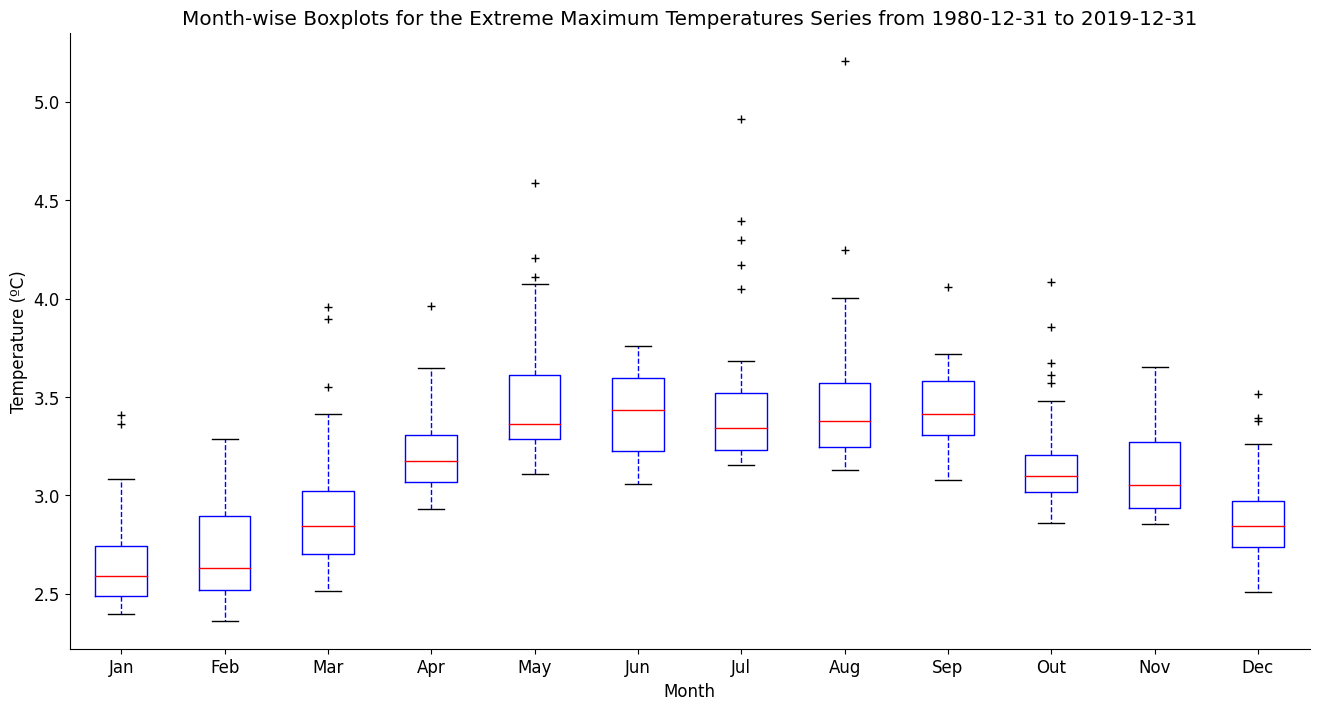

In [137]:
plt.figure(figsize = (16, 8))
bp4 = plt.boxplot([X_e[X_e.index.month == m] for m in range(1, 13)], labels = months_names, vert = True)
plt.setp(bp4["medians"], color = "red")
plt.setp(bp4["boxes"], color = "blue")
plt.setp(bp4["whiskers"], color = "blue", linestyle = "--")
plt.setp(bp4["fliers"], color = "black", marker = "+")
plt.xlabel("Month")
plt.ylabel("Temperature (ºC)")
plt.title("Month-wise Boxplots for the Extreme Maximum Temperatures Series from 1980-12-31 to 2019-12-31")
plt.show()

Let us look at the month-wise boxplots for the exceedances over the threshold series...

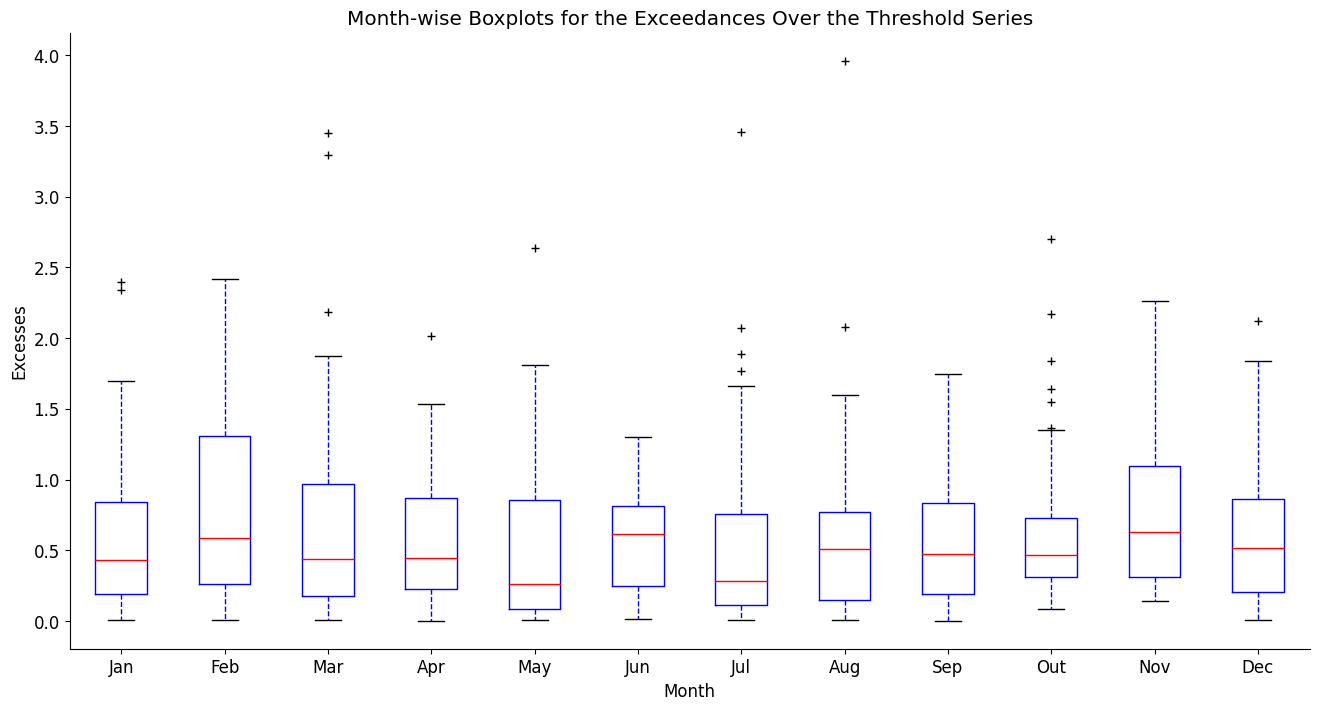

In [139]:
plt.figure(figsize = (16, 8))
bp5 = plt.boxplot([E[E.index.month == m] for m in range(1, 13)], labels = months_names, vert = True)
plt.setp(bp5["medians"], color = "red")
plt.setp(bp5["boxes"], color = "blue")
plt.setp(bp5["whiskers"], color = "blue", linestyle = "--")
plt.setp(bp5["fliers"], color = "black", marker = "+")
plt.xlabel("Month")
plt.ylabel("Excesses")
plt.title("Month-wise Boxplots for the Exceedances Over the Threshold Series")
plt.show()

... and at the year-wise boxplots for the exceedances over the threshold series.

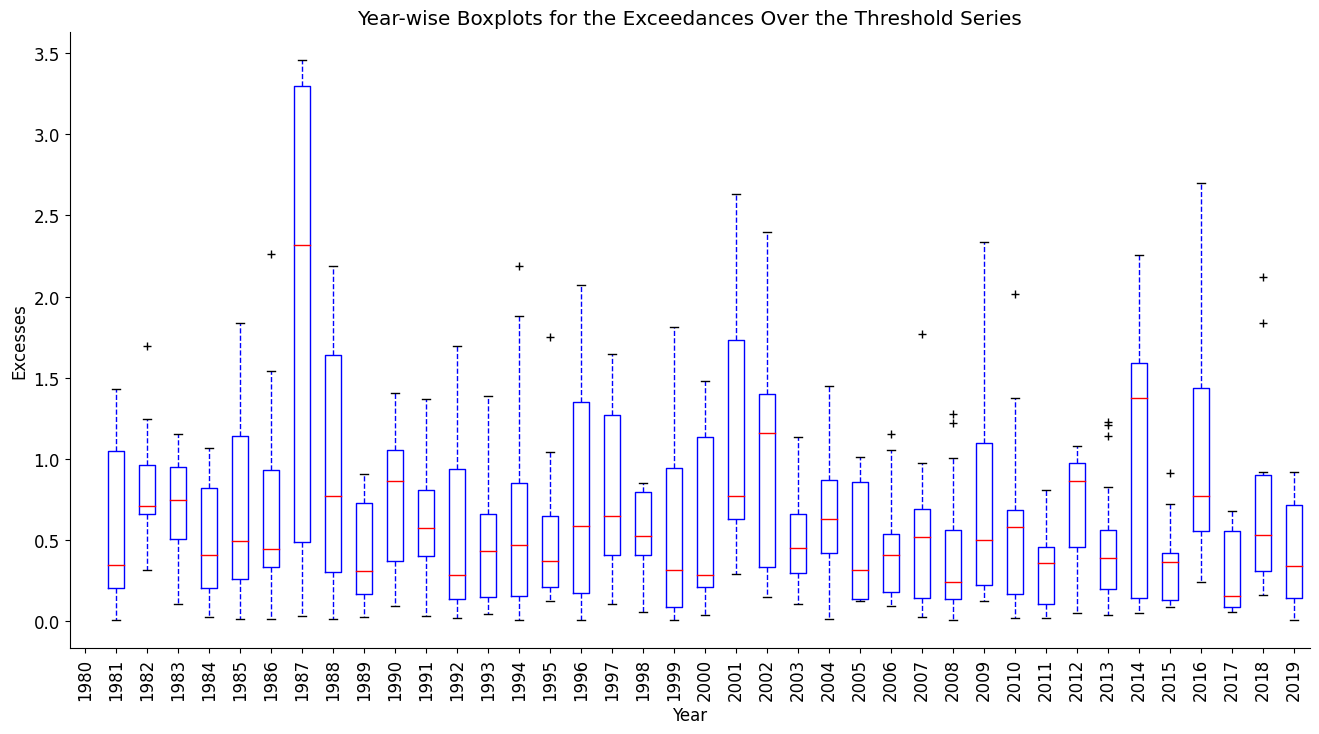

In [140]:
years = np.arange(1980, 2020, dtype = int)
plt.figure(figsize = (16, 8))
bp6 = plt.boxplot([E[E.index.year == y] for y in years], labels = years, vert = True)
plt.xticks(rotation = 90)
plt.setp(bp6["medians"], color = "red")
plt.setp(bp6["boxes"], color = "blue")
plt.setp(bp6["whiskers"], color = "blue", linestyle = "--")
plt.setp(bp6["fliers"], color = "black", marker = "+")
plt.xlabel("Year")
plt.ylabel("Excesses")
plt.title("Year-wise Boxplots for the Exceedances Over the Threshold Series")
plt.show()

Counting the extreme maximum daily temperatures by month from 1980-12-31 to 2019-12-31.

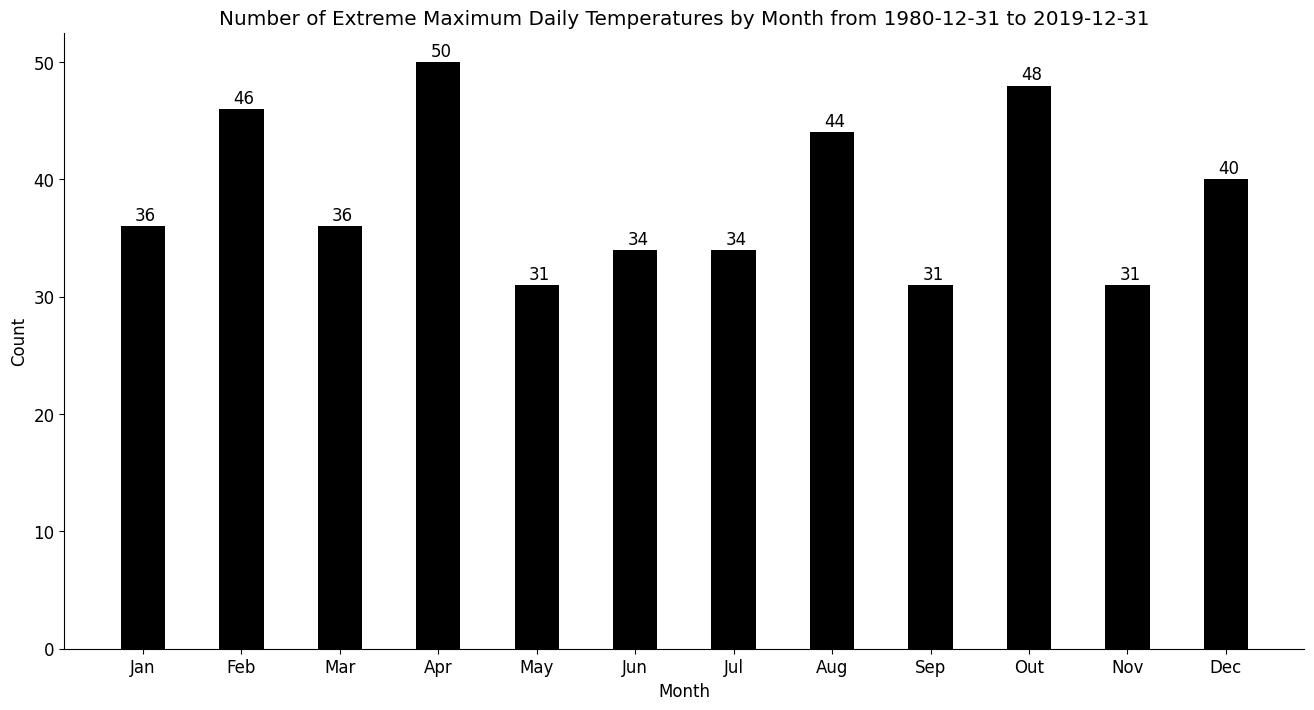

In [141]:
# counting by month
months = np.arange(1, 13, dtype = int)
countd_months = np.zeros(12, dtype = int)
for m in months:
    countd_months[m-1] = E[E.index.month == m].count()

# creating barplot
plt.figure(figsize = (16, 8))
barWidth = 0.45
plt.bar(months, countd_months, width = barWidth)
plt.xticks(months, months_names)
for m in months:
    plt.text(x = months[m-1]-0.08, y = countd_months[m-1]+0.5, s = countd_months[m-1], size = 12)
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Number of Extreme Maximum Daily Temperatures by Month from 1980-12-31 to 2019-12-31")
plt.show()

Counting the extreme maximum daily temperatures by season from 1980-12-31 to 2019-12-31.

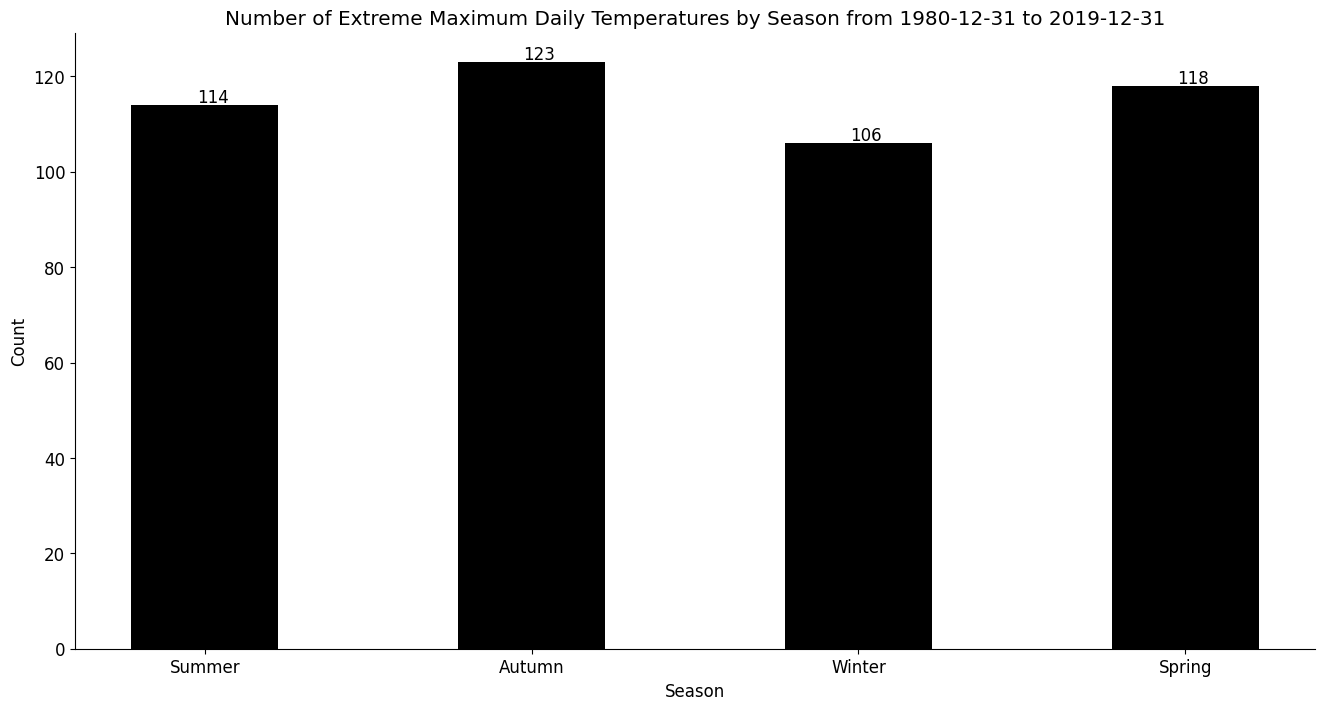

In [142]:
# counting by season
summerd = ((E.index.month == 12) & (E.index.day >= 21)) + (E.index.month == 1) + (E.index.month == 2) + ((E.index.month == 3) & (E.index.day <= 20))
autumnd = ((E.index.month == 3) & (E.index.day >= 21)) + (E.index.month == 4) + (E.index.month == 5) + ((E.index.month == 6) & (E.index.day <= 20))
winterd = ((E.index.month == 6) & (E.index.day >= 21)) + (E.index.month == 7) + (E.index.month == 8) + ((E.index.month == 9) & (E.index.day <= 20))
springd = ((E.index.month == 9) & (E.index.day >= 21)) + (E.index.month == 10) + (E.index.month == 11) + ((E.index.month == 12) & (E.index.day <= 20))
seasons = np.arange(0, 4, dtype = int)
countd_seasons = np.zeros(4, dtype = int)
countd_seasons[0] = E[summerd].count()
countd_seasons[1] = E[autumnd].count()
countd_seasons[2] = E[winterd].count()
countd_seasons[3] = E[springd].count()

# creating barplot
seasons_names = ["Summer", "Autumn", "Winter", "Spring"]
plt.figure(figsize = (16, 8))
barWidth = 0.45
plt.bar(seasons, countd_seasons, width = barWidth)
plt.xticks(seasons, seasons_names)
for s in seasons:
    plt.text(x = seasons[s]-0.025, y = countd_seasons[s]+0.5, s = countd_seasons[s], size = 12)
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Number of Extreme Maximum Daily Temperatures by Season from 1980-12-31 to 2019-12-31")
plt.show()

Counting the extreme maximum daily temperatures by year from 1980-12-31 to 2019-12-31.

From 1980-12-31 to 2019-12-31 there are 422 extreme maximum daily temperatures.


Results of the Ljung-Box Test

    lb_stat  lb_pvalue
1  0.644449   0.422104
2  0.903168   0.636619
3  1.277421   0.734501


Results of Mann-Kendall Trend Test

trend:      no trend
p-value:    0.581945
dtype: object


Results of the Linear Regression

slope:                 [0.05722326454033771]
intercept:                          9.434146
mean squared error:                18.961173
r2 score:                           0.022494
dtype: object


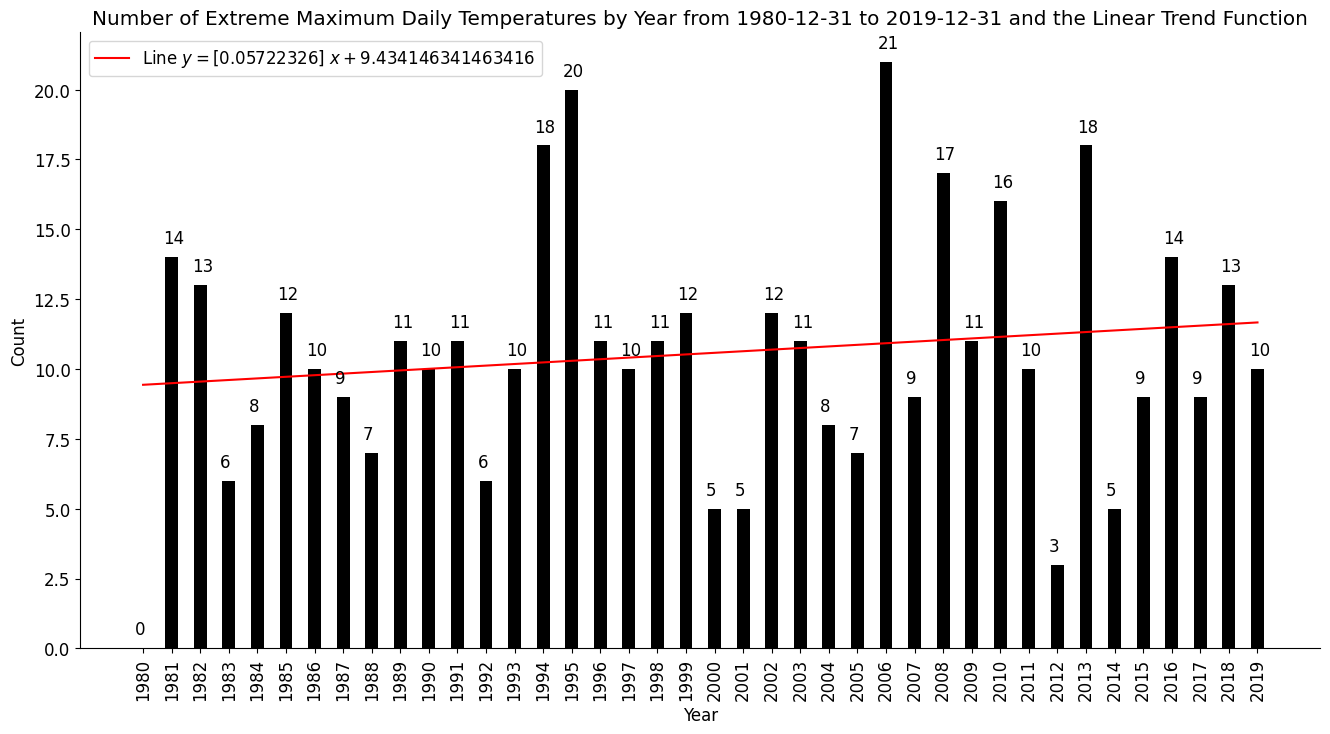

In [144]:
# counting by year
countd_years = np.zeros(40, dtype = int)
for y in years:
    countd_years[y-1980] = E[E.index.year == y].count()
total_number_extreme_days = sum(countd_years) # = len(E)
print("From 1980-12-31 to 2019-12-31 there are {} extreme maximum daily temperatures.".format(total_number_extreme_days))

print("\n")

# performing Ljung-Box Test
print("Results of the Ljung-Box Test\n")
lb_test = acorr_ljungbox(countd_years, lags = 3, boxpierce = False, return_df = True)
print(lb_test)

print("\n")

# performing Mann-Kendall Trend (MK) Test
print("Results of Mann-Kendall Trend Test\n")
mk_test = mk.original_test(countd_years, alpha = 0.05)
mk_output = pd.Series([mk_test[0], mk_test[2]], index = ["trend:", "p-value:"])
print(mk_output)

print("\n")

# creating barplot
plt.figure(figsize = (16, 8))
barWidth = 0.45
plt.bar(years, countd_years, width = barWidth)
plt.xticks(years, years, rotation = 90)
for y in years:
    plt.text(x = years[y-1980]-0.3, y = countd_years[y-1980]+0.5, s = countd_years[y-1980], size = 12)
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Number of Extreme Maximum Daily Temperatures by Year from 1980-12-31 to 2019-12-31 and the Linear Trend Function")
x = (years - years[0]).reshape(-1, 1)
y = countd_years
model = linear_model.LinearRegression().fit(x, y)
y_fit = model.predict(x)
print("Results of the Linear Regression\n")
lm_output = pd.Series([model.coef_, model.intercept_, mean_squared_error(y, y_fit), r2_score(y, y_fit)], index = ["slope:", "intercept:", "mean squared error:", "r2 score:"])
print(lm_output)
plt.plot(years, y_fit, color = "red", label = "Line $y = $" + str(model.coef_) + " $x +$" + str(model.intercept_))
plt.legend(loc = "best")
plt.show()

Counting the accumulated number of extreme maximum daily temperatures from 1980-12-31 to 2019-12-31.

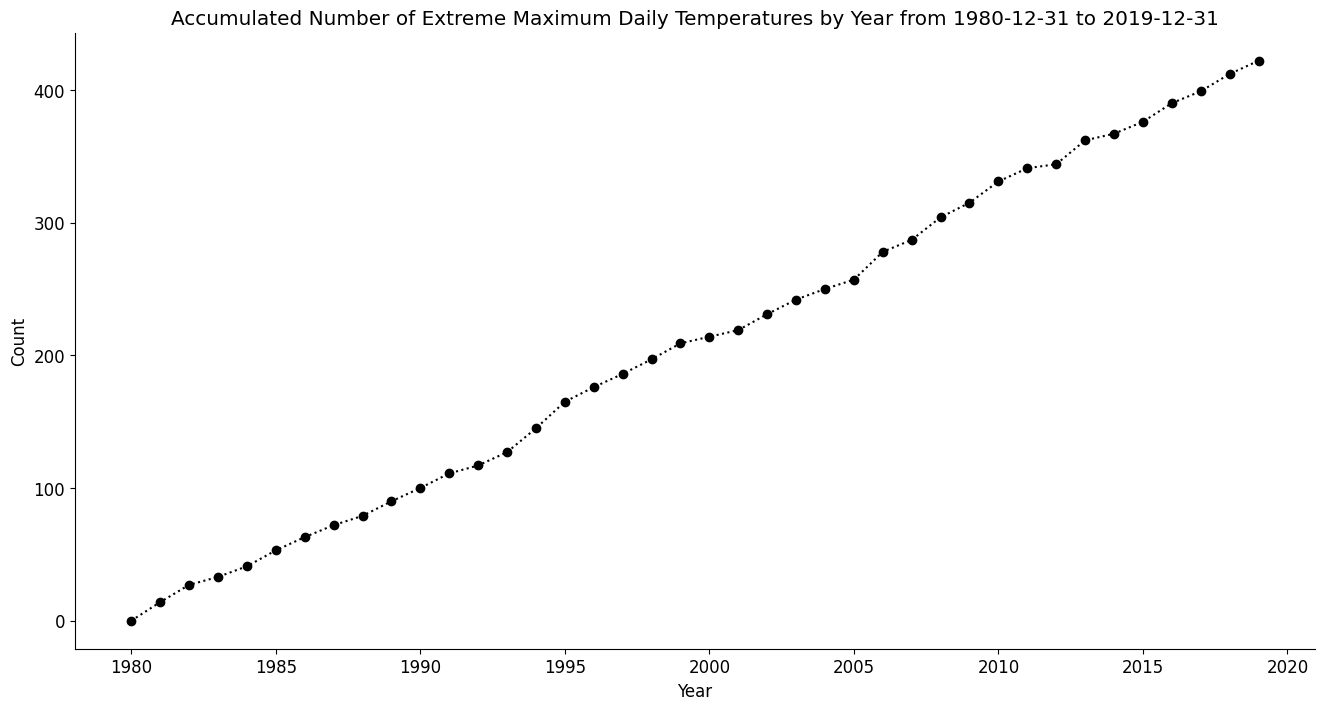

In [145]:
# accumulated number of extreme days
accumulated_countd_years = np.zeros(40, dtype = int)
for j in range(0, 40):
    accumulated_countd_years[j] = sum(countd_years[k] for k in range(0, j+1))

# plotting the accumulated number of extreme days
plt.figure(figsize = (16, 8))
plt.plot(years, accumulated_countd_years, linestyle = ":", marker = "o")
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Accumulated Number of Extreme Maximum Daily Temperatures by Year from 1980-12-31 to 2019-12-31")
plt.show()

#### 3.4.2. Extreme Maximum Events

Let us call $\textit{extreme event}$ a sequence of $n$ consecutive days of extreme observations, $n=1,2,\ldots$. The number $n$ is called $\textit{duration of the extreme event}$.

In [146]:
# about events: identification, initial date, final date and duration of each event
days = len(W_max_daily.index) # number of days from 1980-12-31 to 2019-12-31
n = 0
events_durations = []
events_id = []
events_fd = []
for d in range(0, days):
    if W_max_daily[W_max_daily.index[d]] > u0:
        n = n + 1
    else:
        if n != 0:
            events_durations.append(n)
            events_id.append(W_max_daily.index[(d-1)-(n-1)])
            events_fd.append(W_max_daily.index[d-1])
            n = 0
durations = pd.Series(events_durations, index = events_fd, dtype = float, name = "durations of extreme maximum events")

Counting the extreme maximum events by month from 1980-12-31 to 2019-12-31.

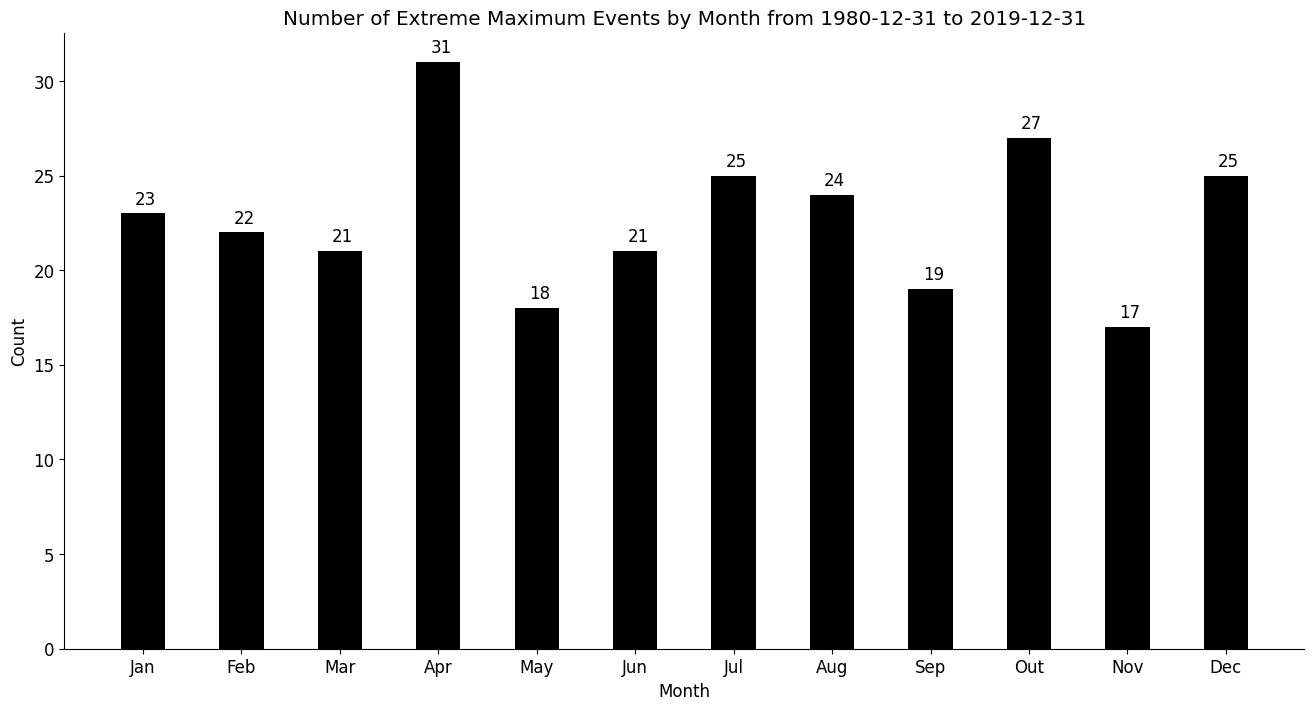

In [147]:
# counting by month
counte_months = np.zeros(12, dtype = int)
for m in months:
    counte_months[m-1] = durations[durations.index.month == m].count()

# creating barplot
plt.figure(figsize = (16, 8))
barWidth = 0.45
plt.bar(months, counte_months, width = barWidth)
plt.xticks(months, months_names)
for m in months:
    plt.text(x = months[m-1]-0.08, y = counte_months[m-1]+0.5, s = counte_months[m-1], size = 12)
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Number of Extreme Maximum Events by Month from 1980-12-31 to 2019-12-31")
plt.show()

Counting the extreme maximum events by season from 1980-12-31 to 2019-12-31.

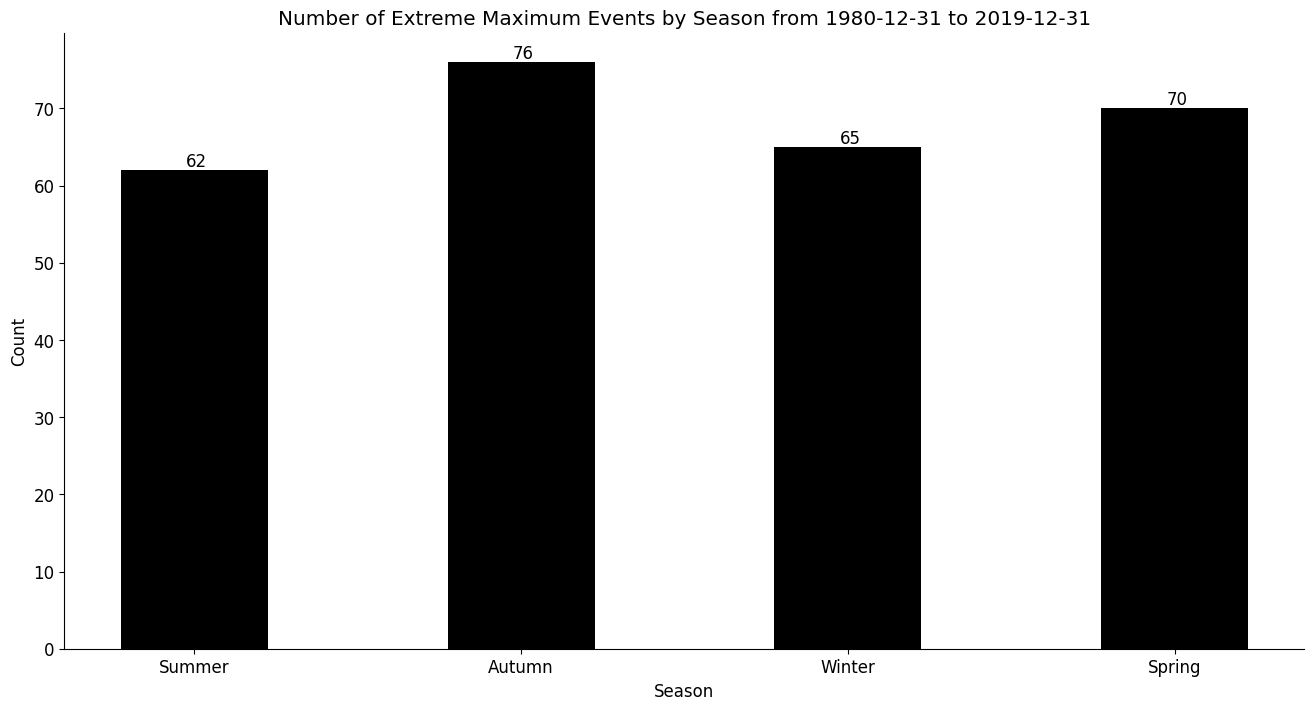

In [148]:
# counting by season
summere = ((durations.index.month == 12) & (durations.index.day >= 21)) + (durations.index.month == 1) + (durations.index.month == 2) + ((durations.index.month == 3) & (durations.index.day <= 20))
autumne = ((durations.index.month == 3) & (durations.index.day >= 21)) + (durations.index.month == 4) + (durations.index.month == 5) + ((durations.index.month == 6) & (durations.index.day <= 20))
wintere = ((durations.index.month == 6) & (durations.index.day >= 21)) + (durations.index.month == 7) + (durations.index.month == 8) + ((durations.index.month == 9) & (durations.index.day <= 20))
springe = ((durations.index.month == 9) & (durations.index.day >= 21)) + (durations.index.month == 10) + (durations.index.month == 11) + ((durations.index.month == 12) & (durations.index.day <= 20))
counte_seasons = np.zeros(4, dtype = int)
counte_seasons[0] = durations[summere].count()
counte_seasons[1] = durations[autumne].count()
counte_seasons[2] = durations[wintere].count()
counte_seasons[3] = durations[springe].count()

# creating barplot
plt.figure(figsize = (16, 8))
barWidth = 0.45
plt.bar(seasons, counte_seasons, width = barWidth)
plt.xticks(seasons, seasons_names)
for s in seasons:
    plt.text(x = seasons[s]-0.025, y = counte_seasons[s]+0.5, s = counte_seasons[s], size = 12)
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Number of Extreme Maximum Events by Season from 1980-12-31 to 2019-12-31")
plt.show()

Counting the extreme maximum events by year from 1980-12-31 to 2019-12-31.

From 1980-12-31 to 2019-12-31 there are 251 extreme maximum events.


Results of the Ljung-Box Test

    lb_stat  lb_pvalue
1  0.082087   0.774489
2  0.083149   0.959278
3  0.891692   0.827432


Results of Mann-Kendall Trend Test

trend:      no trend
p-value:    0.813634
dtype: object


Results of the Linear Regression

slope:                 [0.016979362101313324]
intercept:                           5.943902
mean squared error:                  5.960959
r2 score:                            0.006403
dtype: object


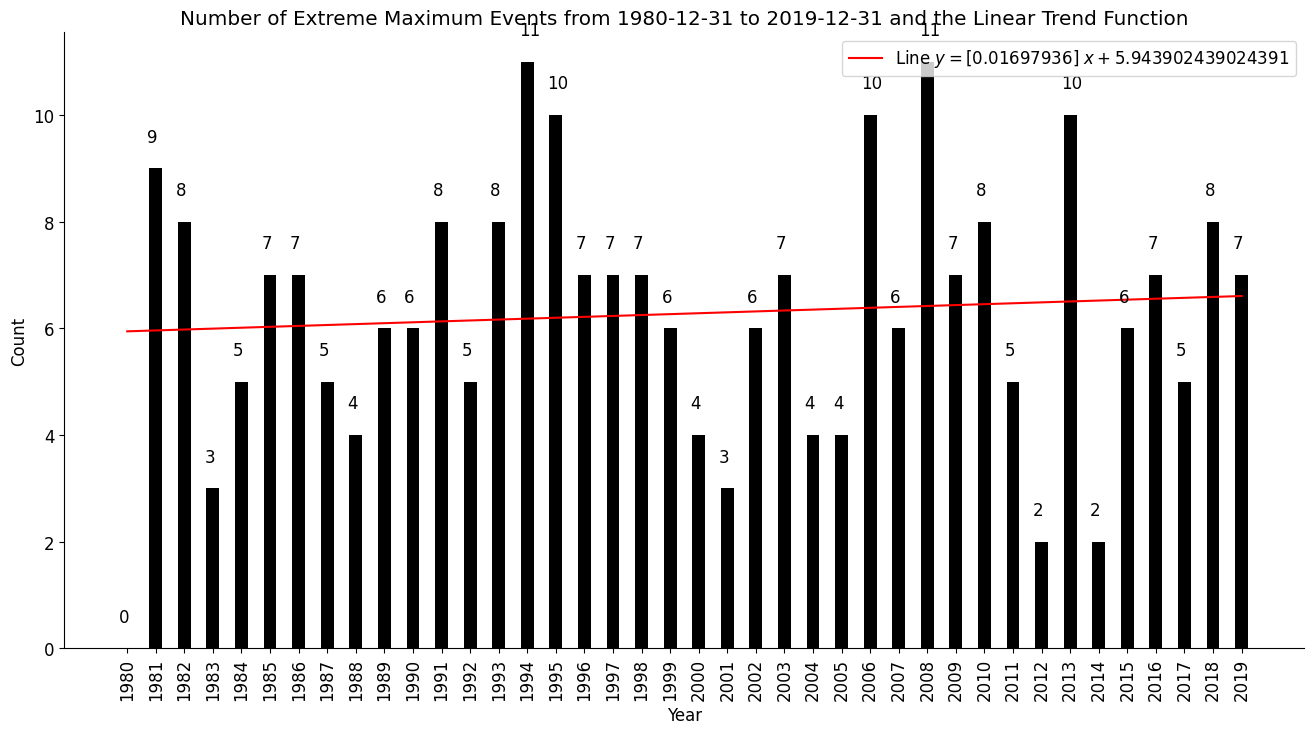

In [150]:
# counting by year
counte_years = np.zeros(40, dtype = int)
for y in years:
    counte_years[y-1980] = durations[durations.index.year == y].count()
total_number_extreme_events = sum(counte_years)
print("From 1980-12-31 to 2019-12-31 there are {} extreme maximum events.".format(total_number_extreme_events))

print("\n")

# performing Ljung-Box Test
print("Results of the Ljung-Box Test\n")
lb_test = acorr_ljungbox(counte_years, lags = 3, boxpierce = False, return_df = True)
print(lb_test)

print("\n")

# performing Mann-Kendall Trend (MK) Test
print("Results of Mann-Kendall Trend Test\n")
mk_test = mk.original_test(counte_years, alpha = 0.05)
mk_output = pd.Series([mk_test[0], mk_test[2]], index = ["trend:", "p-value:"])
print(mk_output)

print("\n")

# creating barplot
plt.figure(figsize = (16, 8))
barWidth = 0.45
plt.bar(years, counte_years, width = barWidth)
plt.xticks(years, years, rotation = 90)
for y in years:
    plt.text(x = years[y-1980]-0.3, y = counte_years[y-1980]+0.5, s = counte_years[y-1980], size = 12)
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Number of Extreme Maximum Events from 1980-12-31 to 2019-12-31 and the Linear Trend Function")
x = (years - years[0]).reshape(-1, 1)
y = counte_years
model = linear_model.LinearRegression().fit(x, y)
y_fit = model.predict(x)
print("Results of the Linear Regression\n")
lm_output = pd.Series([model.coef_, model.intercept_, mean_squared_error(y, y_fit), r2_score(y, y_fit)], index = ["slope:", "intercept:", "mean squared error:", "r2 score:"])
print(lm_output)
plt.plot(years, y_fit, color = "red", label = "Line $y = $" + str(model.coef_) + " $x +$" + str(model.intercept_))
plt.legend(loc = "best")
plt.show()

Counting the accumulated number of extreme maximum events from 1980-12-31 to 2019-12-31.

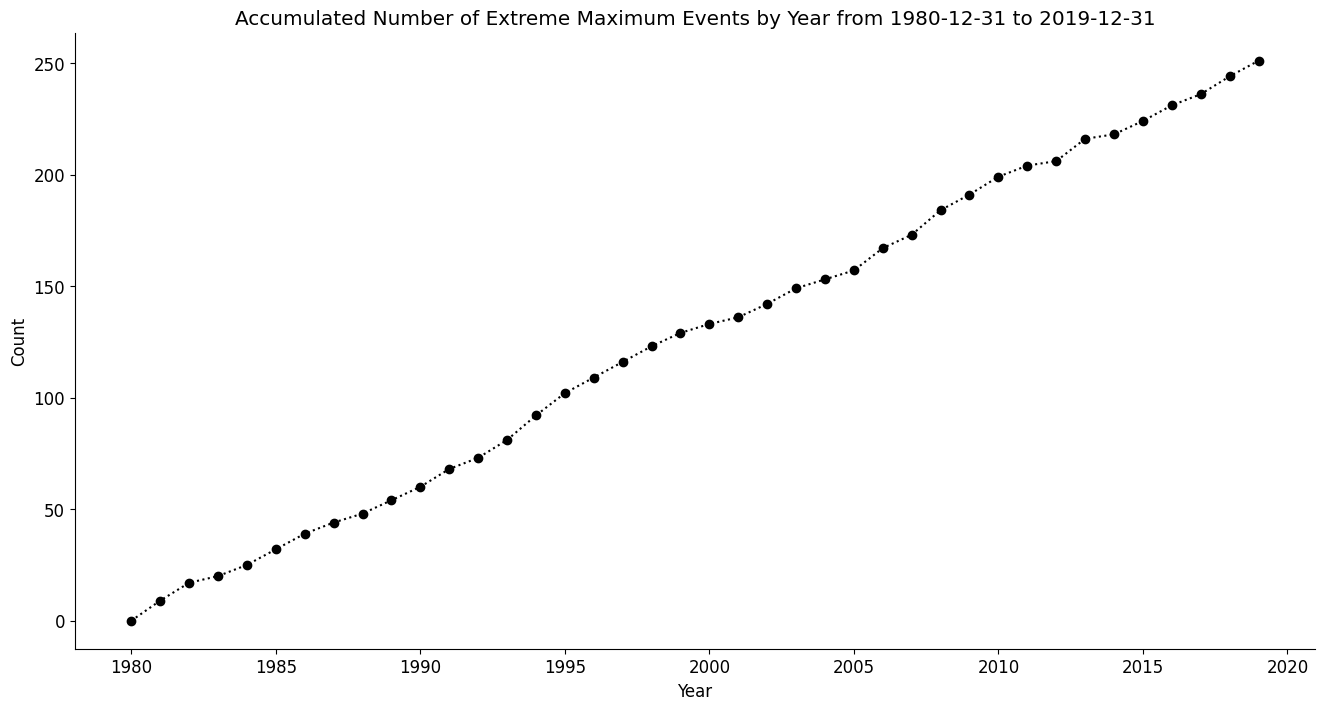

In [151]:
# accumulated number of extreme maximum events
accumulated_counte_numbers = np.zeros(40, dtype = int)
for j in range(0, 40):
    accumulated_counte_numbers[j] = sum(counte_years[k] for k in range(0, j+1))

# plotting the accumulated number of extreme maximum events
plt.figure(figsize = (16, 8))
plt.plot(years, accumulated_counte_numbers, linestyle = ":", marker = "o")
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Accumulated Number of Extreme Maximum Events by Year from 1980-12-31 to 2019-12-31")
plt.show()

Below we plot the duration of each extreme maximum event from 1980-12-31 to 2019-12-31.

Results of the Ljung-Box Test

    lb_stat  lb_pvalue
1  0.327068   0.567391
2  0.629080   0.730125
3  2.912223   0.405358


Results of Mann-Kendall Trend Test

trend:      no trend
p-value:    0.202443
dtype: object


Results of the Linear Regression

slope:                 [1.2970694062124367e-05]
intercept:                             1.589366
mean squared error:                    0.555405
r2 score:                              0.005961
dtype: object


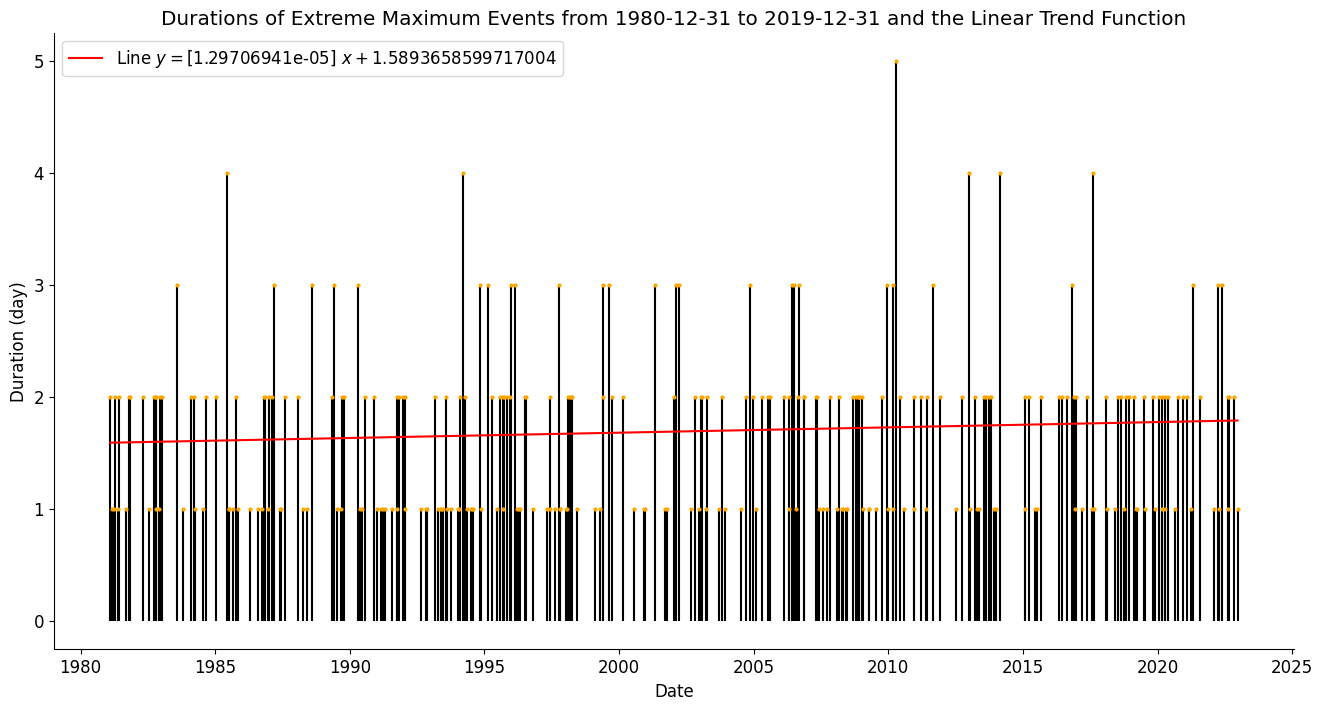

In [152]:
# performing Ljung-Box Test
print("Results of the Ljung-Box Test\n")
lb_test = acorr_ljungbox(durations, lags = 3, boxpierce = False, return_df = True)
print(lb_test)

print("\n")

# performing Mann-Kendall Trend (MK) Test
print("Results of Mann-Kendall Trend Test\n")
mk_test = mk.original_test(durations, alpha = 0.05)
mk_output = pd.Series([mk_test[0], mk_test[2]], index = ["trend:", "p-value:"])
print(mk_output)

print("\n")

# plotting the durations of extreme maximum events
plt.figure(figsize = (16, 8))
st3 = plt.stem(durations.index, durations.values, use_line_collection = True)
plt.setp(st3[0], color = "orange", marker = "o", markersize = 2)
plt.setp(st3[1], color = "black", linestyle = "-")
plt.setp(st3[2], visible = False)
plt.xlabel("Date")
plt.ylabel("Duration (day)")
plt.title("Durations of Extreme Maximum Events from 1980-12-31 to 2019-12-31 and the Linear Trend Function")
x = ((durations.index - durations.index[0]).astype("timedelta64[h]")/24).values.reshape(-1, 1)
y = durations.values
model = linear_model.LinearRegression().fit(x, y)
y_fit = model.predict(x)
print("Results of the Linear Regression\n")
lm_output = pd.Series([model.coef_, model.intercept_, mean_squared_error(y, y_fit), r2_score(y, y_fit)], index = ["slope:", "intercept:", "mean squared error:", "r2 score:"])
print(lm_output)
plt.plot(durations.index, y_fit, color = "red", label = "Line $y = $" + str(model.coef_) + " $x +$" + str(model.intercept_))
plt.legend(loc = "best")
plt.show()

And now we look at the time elapsed between consecutive extreme maximum events.

Results of the Ljung-Box Test

    lb_stat  lb_pvalue
1  0.060495   0.805715
2  0.394270   0.821080
3  1.167203   0.760881


Results of Mann-Kendall Trend Test

trend:      no trend
p-value:    0.616951
dtype: object
Results of the Linear Regression

slope:                 [0.010265108241731866]
intercept:                          55.152827
mean squared error:                2859.91082
r2 score:                            0.000192
dtype: object


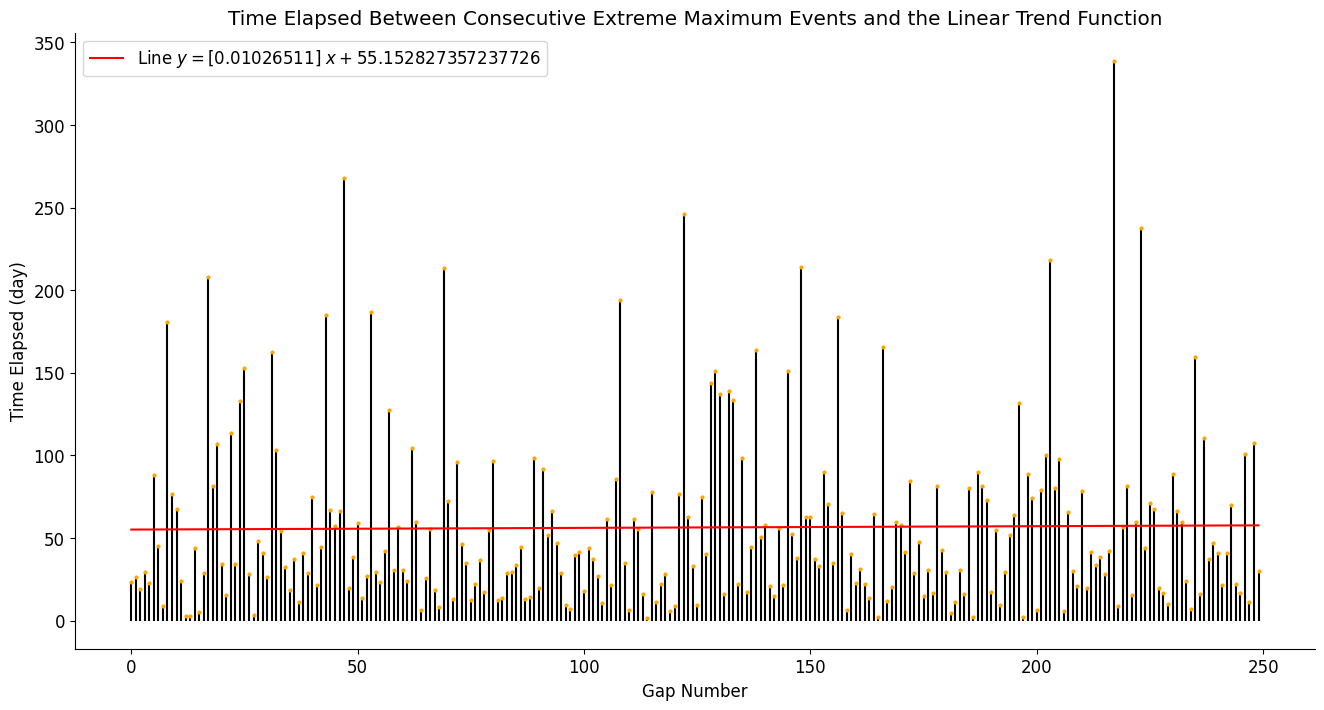

In [153]:
# calculating the time elapsed between consecutive extreme maximum events
differences_events = []
for k in range(0, total_number_extreme_events-1):
    differences_events.append(events_id[k+1] - events_fd[k])
time_elapsed_events = pd.Series(differences_events)
time_elapsed_events = time_elapsed_events.rename("time elapsed between consecutive extreme maximum events")

# performing Ljung-Box Test
print("Results of the Ljung-Box Test\n")
lb_test = acorr_ljungbox(time_elapsed_events, lags = 3, boxpierce = False, return_df = True)
print(lb_test)

print("\n")

# performing Mann-Kendall Trend (MK) Test
print("Results of Mann-Kendall Trend Test\n")
mk_test = mk.original_test(time_elapsed_events.astype("timedelta64[h]")/24, alpha = 0.05)
mk_output = pd.Series([mk_test[0], mk_test[2]], index = ["trend:", "p-value:"])
print(mk_output)

#print("\n")

# plotting the time elapsed between consecutive extreme maximum events
plt.figure(figsize = (16, 8))
st4 = plt.stem(time_elapsed_events.index, time_elapsed_events.astype("timedelta64[h]").values/24, use_line_collection = True)
plt.setp(st4[0], color = "orange", marker = "o", markersize = 2)
plt.setp(st4[1], color = "black", linestyle = "-")
plt.setp(st4[2], visible = False)
plt.xlabel("Gap Number")
plt.ylabel("Time Elapsed (day)")
plt.title("Time Elapsed Between Consecutive Extreme Maximum Events and the Linear Trend Function")
x = (time_elapsed_events.index - time_elapsed_events.index[0]).values.reshape(-1, 1)
y = (time_elapsed_events.astype("timedelta64[h]")/24).values
model = linear_model.LinearRegression().fit(x, y)
y_fit = model.predict(x)
print("Results of the Linear Regression\n")
lm_output = pd.Series([model.coef_, model.intercept_, mean_squared_error(y, y_fit), r2_score(y, y_fit)], index = ["slope:", "intercept:", "mean squared error:", "r2 score:"])
print(lm_output)
plt.plot(time_elapsed_events.index, y_fit, color = "red", label = "Line $y = $" + str(model.coef_) + " $x +$" + str(model.intercept_))
plt.legend(loc = "best")
plt.show()